# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## Data Structure
| Column Name     | Details                                                                                                                                                                                                 |
|-----------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| recipe          | Numeric, unique identifier of recipe                                                                                                                                                                   |
| calories        | Numeric, number of calories                                                                                                                                                                            |
| carbohydrate    | Numeric, amount of carbohydrates in grams                                                                                                                                                              |
| sugar           | Numeric, amount of sugar in grams                                                                                                                                                                      |
| protein         | Numeric, amount of protein in grams                                                                                                                                                                    |
| category        | Character, type of recipe. Recipes are listed in one of ten possible groupings ('Lunch/Snacks', 'Beverages', 'Potato', 'Vegetable', 'Meat', 'Chicken', 'Pork', 'Dessert', 'Breakfast', 'One Dish Meal'). |
| servings        | Numeric, number of servings for the recipe                                                                                                                                                             |
| high_traffic    | Character, if the traffic to the site was high when this recipe was shown, this is marked with “High”.                                                                                                 |


## Main Goal
- "...predict which recipes will be popular 80% of the time and minimize the chance of showing unpopular recipes."

## Library Imports
Necessary libraries for the entire notebook

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

## Data Loading and Validation
Loading the dataset, validating initial data structure based on data description sent by the team.

In [32]:
df = pd.read_csv('recipe_site_traffic_2212.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB
None


,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


Some missing information can be seen from the beginning, now formatting each column as described in the email.

### Recipe Column
Recipe is a unique identifier, so it shouldn't present duplicates.

In [33]:
column = 'recipe'
duplicates = df[column].duplicated().sum()
missing = df[column].isnull().sum()

print(f"Found {duplicates} duplicates in column {column}.")
print(f"Found {missing} missing entries in column {column}.")

if missing > 0:
    print(f"The missing values represent {round(((missing/len(df[column]))*100),2)}% of the data.")

Found 0 duplicates in column recipe.
Found 0 missing entries in column recipe.


Recipe column is complete and clean, no problem with it.

### Calories Column
Calories should be in float format and not have missing values nor negative ones.

In [34]:
column = 'calories'

missing = df[column].isnull().sum()
negative = len(df[df[column] < 0])

print(f"Found {negative} negative entries in column {column}.")
print(f"Found {missing} missing entries in column {column}.")
if missing > 0:
    print(f"The missing values represent {round(((missing/len(df[column]))*100),2)}% of the data.")

Found 0 negative entries in column calories.
Found 52 missing entries in column calories.
The missing values represent 5.49% of the data.


### Carbohydrate Column
Carbohydrate should be in float format and not have missing values nor negative ones.

In [35]:
column = 'carbohydrate'

missing = df[column].isnull().sum()
negative = len(df[df[column] < 0])

print(f"Found {negative} negative entries in column {column}.")

print(f"Found {missing} missing entries in column {column}.")
if missing > 0:
    print(f"The missing values represent {round(((missing/len(df[column]))*100),2)}% of the data.")

Found 0 negative entries in column carbohydrate.
Found 52 missing entries in column carbohydrate.
The missing values represent 5.49% of the data.


### Sugar Column
Sugar should be in float format and not have missing values nor negative ones.

In [36]:
column = 'sugar'

missing = df[column].isnull().sum()
negative = len(df[df[column] < 0])

print(f"Found {negative} negative entries in column {column}.")

print(f"Found {missing} missing entries in column {column}.")
if missing > 0:
    print(f"The missing values represent {round(((missing/len(df[column]))*100),2)}% of the data.")

Found 0 negative entries in column sugar.
Found 52 missing entries in column sugar.
The missing values represent 5.49% of the data.


### Protein Column
Protein should be in float format and not have missing values nor negative ones.

In [37]:
column = 'protein'

missing = df[column].isnull().sum()
negative = len(df[df[column] < 0])

print(f"Found {negative} negative entries in column {column}.")

print(f"Found {missing} missing entries in column {column}.")
if missing > 0:
    print(f"The missing values represent {round(((missing/len(df[column]))*100),2)}% of the data.")

Found 0 negative entries in column protein.
Found 52 missing entries in column protein.
The missing values represent 5.49% of the data.


### Missing Rows Situation
These features are the only ones that have missing values (numeric). I believe that the missing rows (recipes) from "calories", "carbohydrate", "sugar" and "protein" are exactly the same, I explore that further on this section.

In [38]:
missing_calories = df[df['calories'].isnull()]['recipe']
missing_carbohydrate = df[df['carbohydrate'].isnull()]['recipe']
missing_sugar = df[df['sugar'].isnull()]['recipe']
missing_protein = df[df['protein'].isnull()]['recipe']

same_missing_rows = (missing_calories & missing_carbohydrate & missing_sugar & missing_protein).all()

same_missing_rows

True

#### Missing Rows Handling Decision
Given that the missing rows are exactly the same for the features mentioned before, it would be unrealistic to do any type of imputation as we would be synthetically creating nutritional values for entire recipes and that could negatively affect data integrity, we want to preserve the dataset's overall integrity and realiability, which is why I'll be dropping them.

In [39]:
df.dropna(subset=['calories'],inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 895 entries, 1 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        895 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      895 non-null    object 
 6   servings      895 non-null    object 
 7   high_traffic  535 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 62.9+ KB


### Category Column
Data should fall in any of the following categories:

('Lunch/Snacks', 'Beverages', 'Potato', 'Vegetable', 'Meat', 'Chicken', 'Pork', 'Dessert', 'Breakfast', 'One Dish Meal').

In [40]:
df['category'].value_counts()

Breakfast         106
Chicken Breast     94
Beverages          92
Potato             83
Lunch/Snacks       82
Vegetable          78
Dessert            77
Meat               74
Pork               73
Chicken            69
One Dish Meal      67
Name: category, dtype: int64

It can be seen that all variables are correctly defined excepted for "Chicken Breast", which should only be "Chicken". Correcting that and setting the feature as categorical now:

In [41]:
df['category'] = df['category'].replace({'Chicken Breast':'Chicken'})
df['category'] = df['category'].astype('category')
print(df['category'].cat.categories)
df['category'].value_counts()

Index(['Beverages', 'Breakfast', 'Chicken', 'Dessert', 'Lunch/Snacks', 'Meat',
       'One Dish Meal', 'Pork', 'Potato', 'Vegetable'],
      dtype='object')


Chicken          163
Breakfast        106
Beverages         92
Potato            83
Lunch/Snacks      82
Vegetable         78
Dessert           77
Meat              74
Pork              73
One Dish Meal     67
Name: category, dtype: int64

### Servings Column
The servings column should be numerical, from the start it is an object dtype, which means it is formatted as text, fixing that here:

In [42]:
df['servings'].value_counts()

4               365
6               184
2               174
1               169
4 as a snack      2
6 as a snack      1
Name: servings, dtype: int64

The text "4 as a snack" and "6 as a snack" is the reason it is formatted as an object, formatting the column now:

In [43]:
df['servings'] = df['servings'].replace({'4 as a snack':'4',
                                        '6 as a snack':'6'})
df['servings'] = df['servings'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 895 entries, 1 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   recipe        895 non-null    int64   
 1   calories      895 non-null    float64 
 2   carbohydrate  895 non-null    float64 
 3   sugar         895 non-null    float64 
 4   protein       895 non-null    float64 
 5   category      895 non-null    category
 6   servings      895 non-null    int64   
 7   high_traffic  535 non-null    object  
dtypes: category(1), float64(4), int64(2), object(1)
memory usage: 57.2+ KB


### High Traffic Column
This column should either have the values 'high' or 'low'. I'm going to go a step forward here and replace the values with 0s and 1s and leave it ready for the model.

In [44]:
df['high_traffic'].value_counts()

High    535
Name: high_traffic, dtype: int64

**Assumption**
I will assume that the team deliberately left the rows where the traffic was low as empty rows. Provided that assumption, I will make the changes now with the dictionary:

0 = low traffic

1 = high traffic

In [45]:
df['high_traffic'] = df['high_traffic'].fillna('0')
df['high_traffic'] = df['high_traffic'].replace({'High':'1'})
df['high_traffic'] = df['high_traffic'].astype(int)
print(df['high_traffic'].value_counts())
df.info()

1    535
0    360
Name: high_traffic, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 895 entries, 1 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   recipe        895 non-null    int64   
 1   calories      895 non-null    float64 
 2   carbohydrate  895 non-null    float64 
 3   sugar         895 non-null    float64 
 4   protein       895 non-null    float64 
 5   category      895 non-null    category
 6   servings      895 non-null    int64   
 7   high_traffic  895 non-null    int64   
dtypes: category(1), float64(4), int64(3)
memory usage: 57.2 KB


## Exploratory Data Analysis
Main visualization section aimed to understand the feature behaviour and relationships between variables. 

### Uni-Variate Visualizations
This step sets out to explore single features behaviours. 

Proportion of popular recipes below 1000 calories: 88.04%
This proportion highlights how many popular recipes fall below the 1000-calorie threshold.


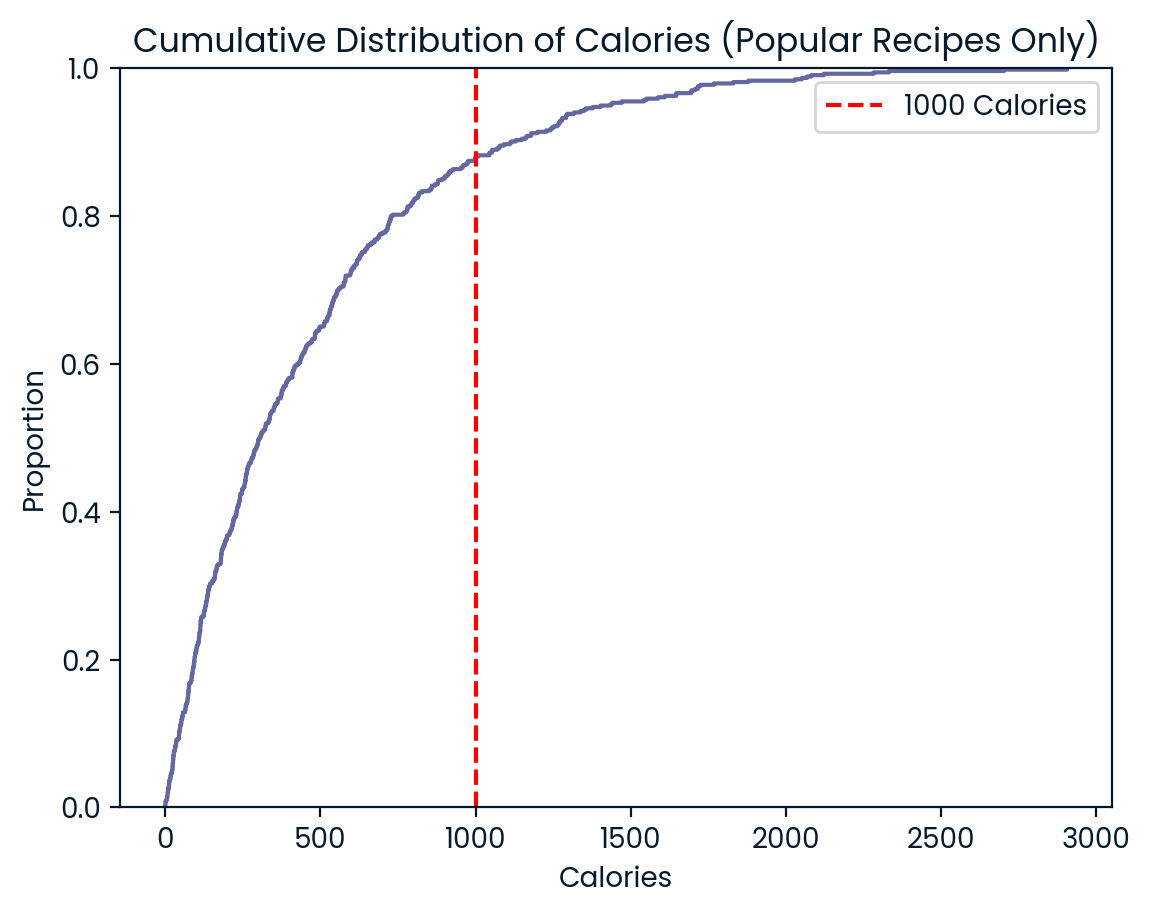

In [46]:
column_of_interest = 'calories'
threshold = 1000

# Filter the data for popular recipes only
popular_recipes = df[df['high_traffic'] == 1]

# Proportion data below the threshold for popular recipes
proportion_below_threshold = (popular_recipes[column_of_interest] < threshold).mean()
print(f"Proportion of popular recipes below {threshold} calories: {proportion_below_threshold:.2%}")
print("This proportion highlights how many popular recipes fall below the 1000-calorie threshold.")

# Plot the cumulative distribution for popular recipes
sns.ecdfplot(data=popular_recipes, x=column_of_interest)
plt.axvline(x=1000, color='red', linestyle='--', label='1000 Calories')
plt.title('Cumulative Distribution of Calories (Popular Recipes Only)')
plt.xlabel('Calories')
plt.ylabel('Proportion')
plt.legend()
plt.show()


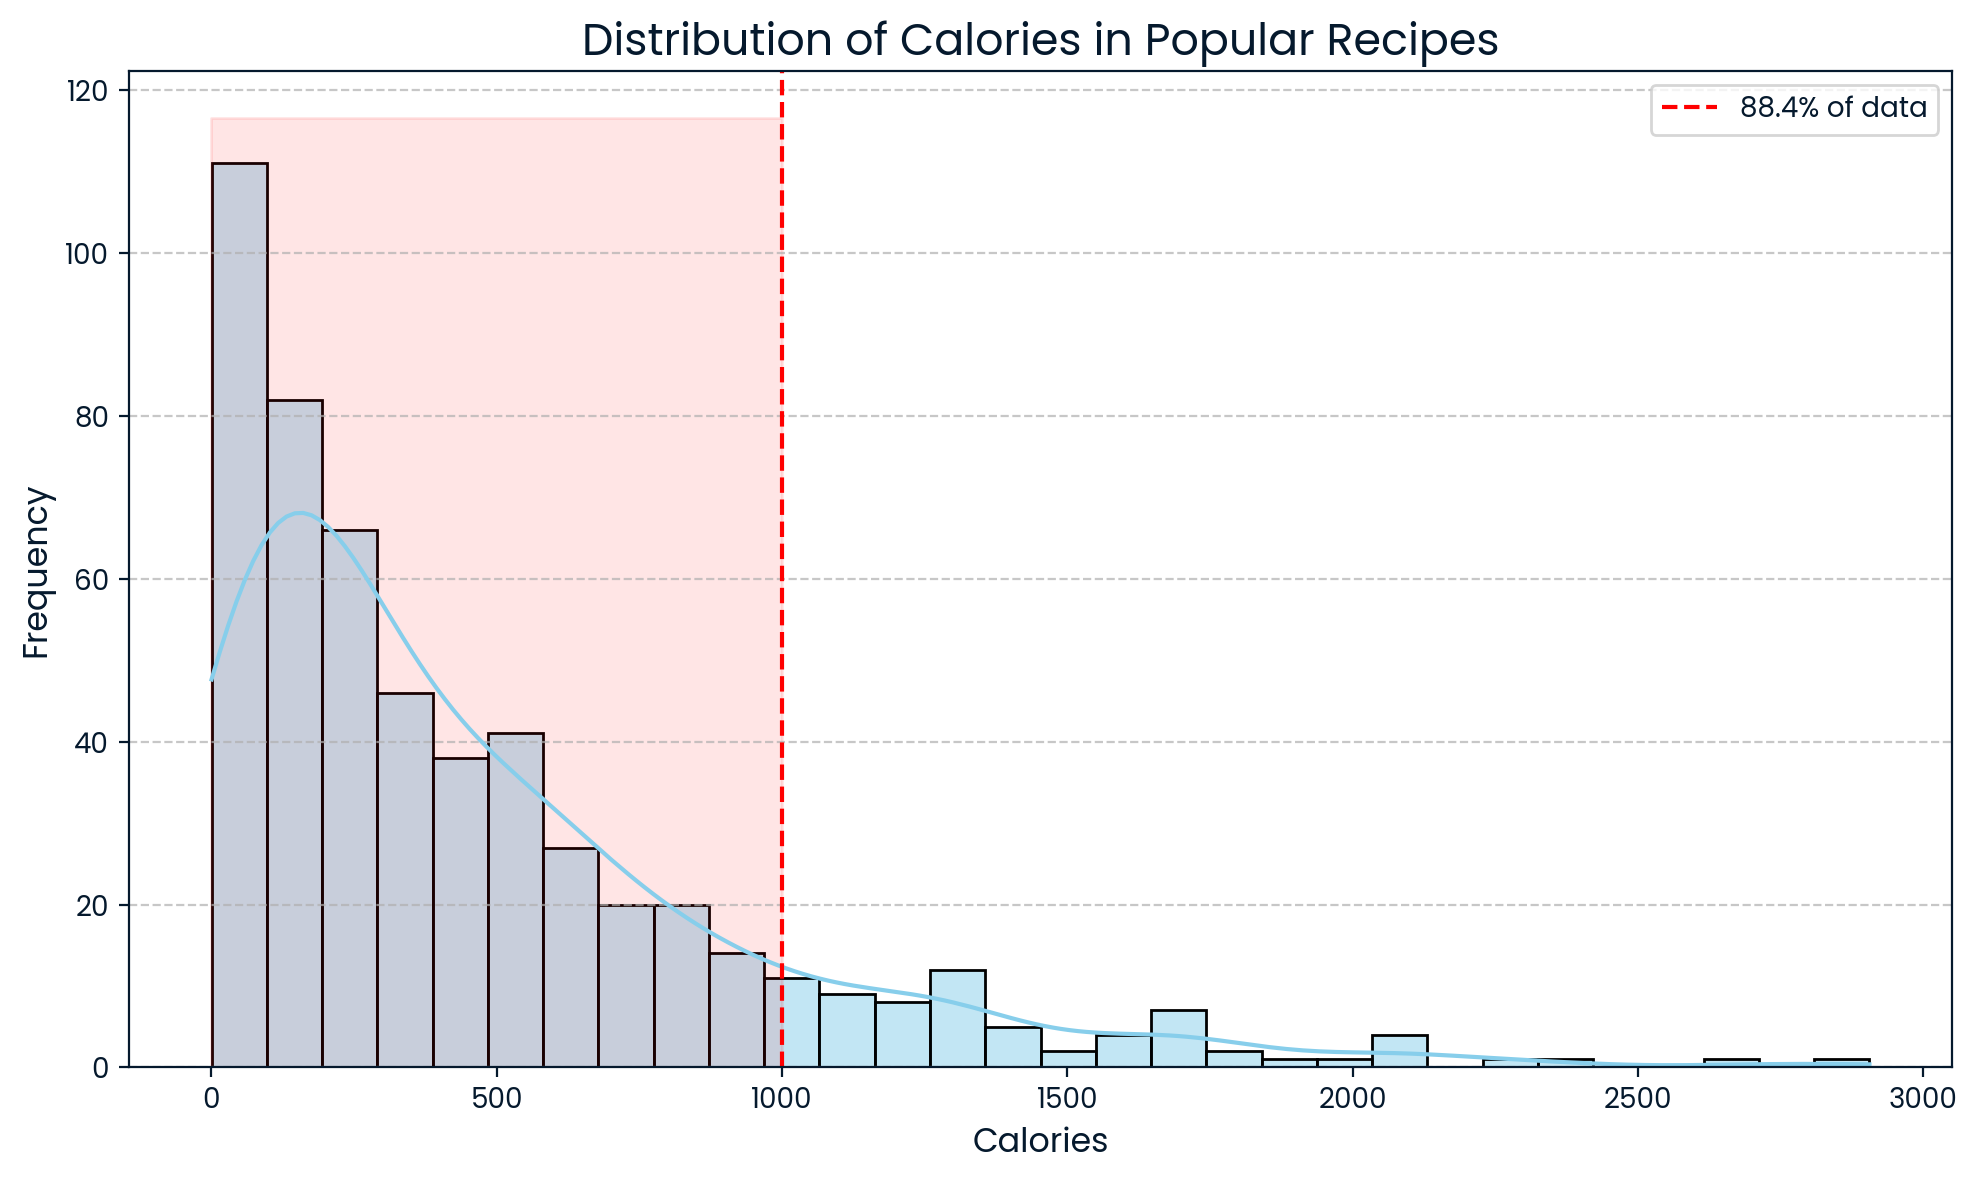

In [47]:
plt.figure(figsize=(10, 6))

# Plot the histogram
sns.histplot(
    data=popular_recipes, 
    x='calories', 
    bins=30,          
    kde=True,         
    color='skyblue',  
    edgecolor='black' 
)

# Shade the area before the 1000-calorie threshold
plt.axvline(1000, color='red', linestyle='--', label='88.4% of data')
plt.fill_betweenx(
    y=[0, plt.gca().get_ylim()[1]],  
    x1=0,                            
    x2=1000,                         
    color='red', 
    alpha=0.1                        
)

plt.title('Distribution of Calories in Popular Recipes', fontsize=16)
plt.xlabel('Calories', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('calories_distribution.png')
plt.show()




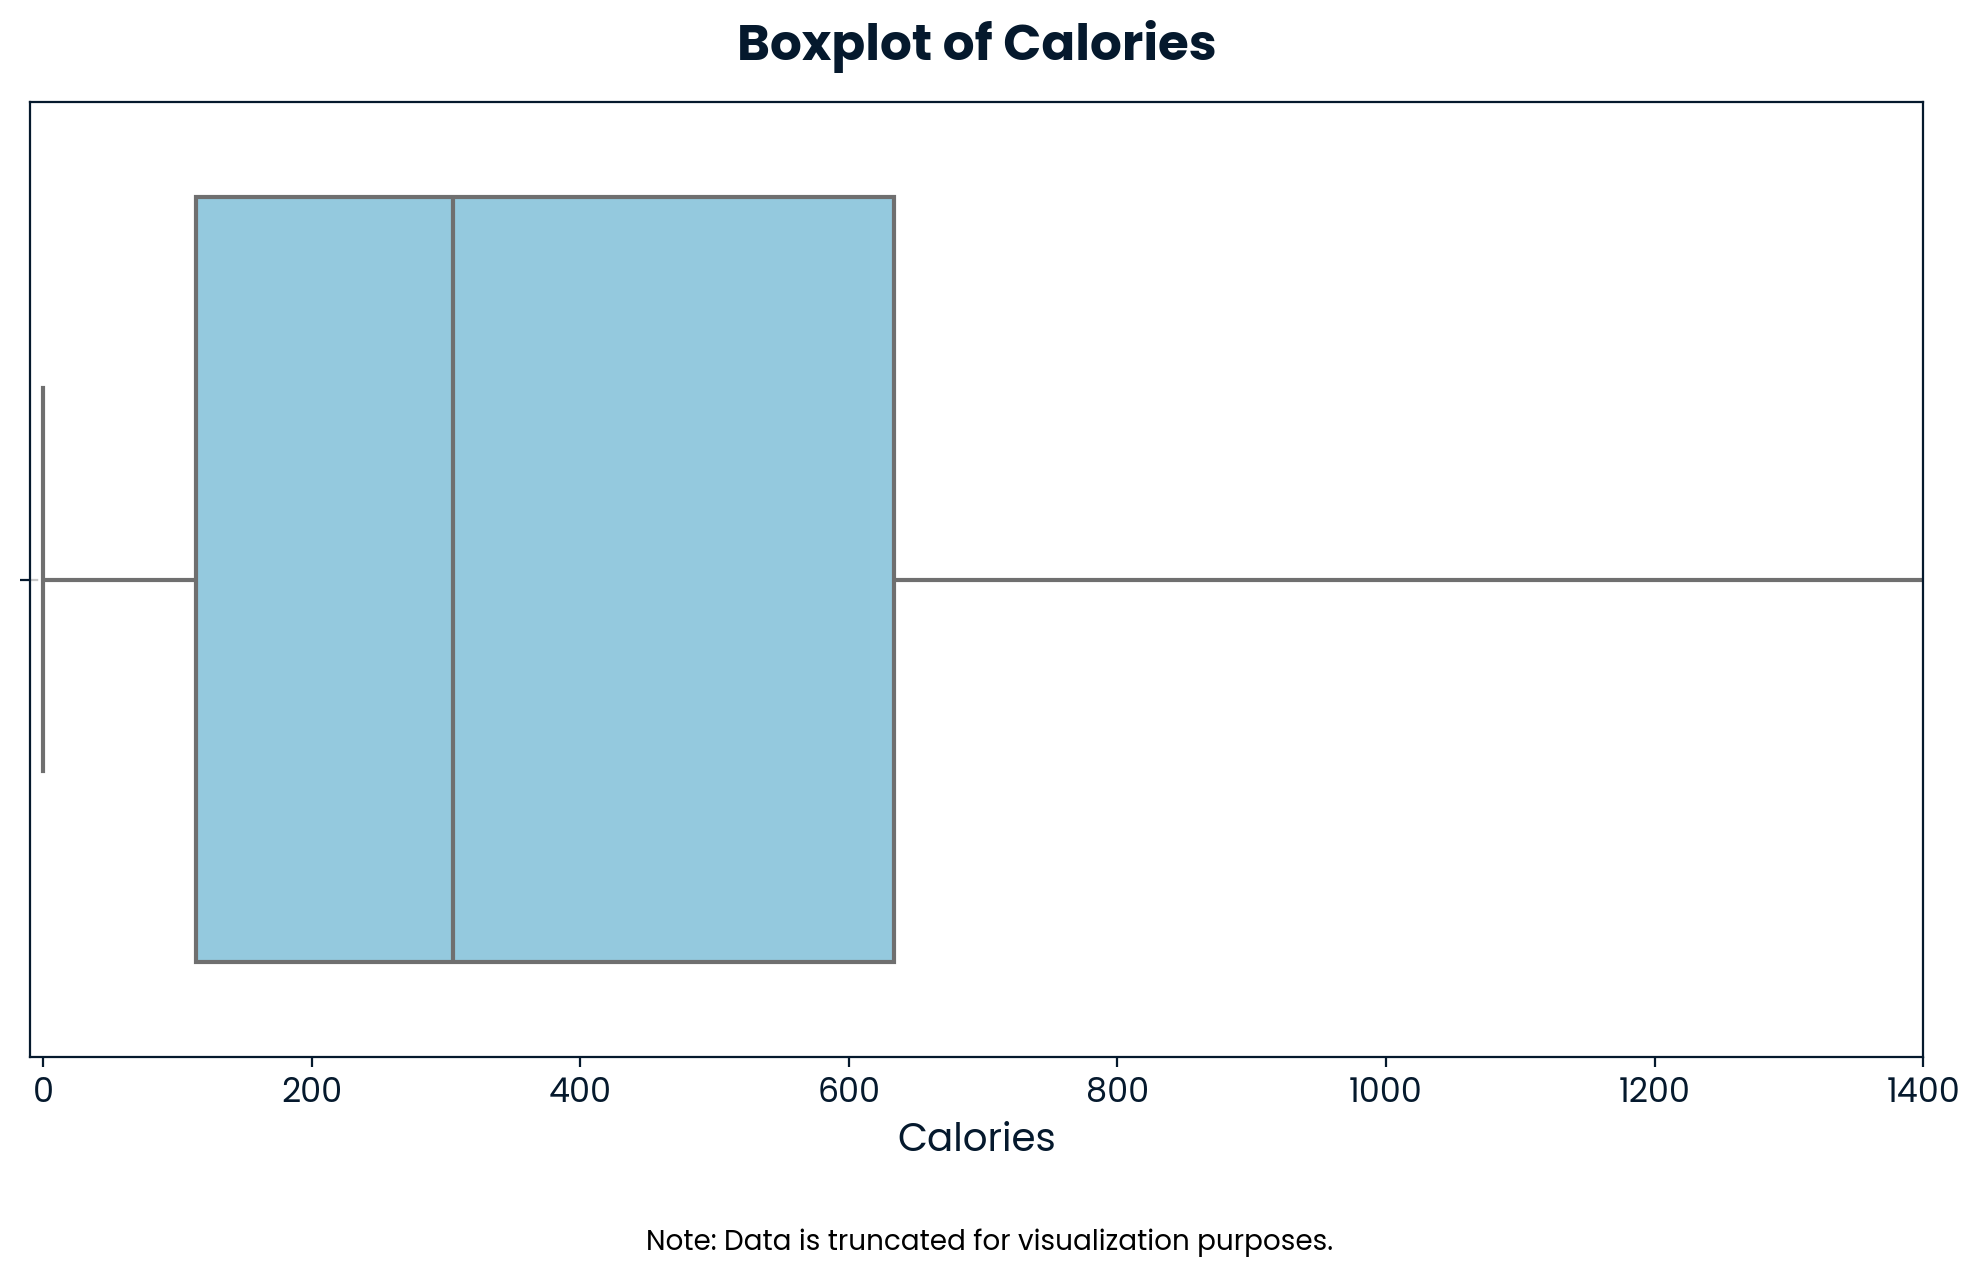

The most popular recipes have between 110.43 and 597.65 calories.


In [48]:
# Boxplot for calories column
plt.figure(figsize=(10, 6))
sns.boxplot(data=popular_recipes, x='calories', color='skyblue', fliersize=5, linewidth=1.5)
plt.title('Boxplot of Calories', fontsize=18, fontweight='bold', pad=15)
plt.xlabel('Calories', fontsize=14)
plt.xticks(fontsize = 12)
plt.xlim(-10, 1400)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.figtext(0.5, -0.05, 'Note: Data is truncated for visualization purposes.', 
            wrap=True, horizontalalignment='center', fontsize=10, color='black')
plt.tight_layout()
plt.show()


column_of_interest = 'calories'
Q1 = df[column_of_interest].quantile(0.25)
Q3 = df[column_of_interest].quantile(0.75)
IQR = Q3 - Q1


print(f"The most popular recipes have between {Q1} and {Q3} calories.")

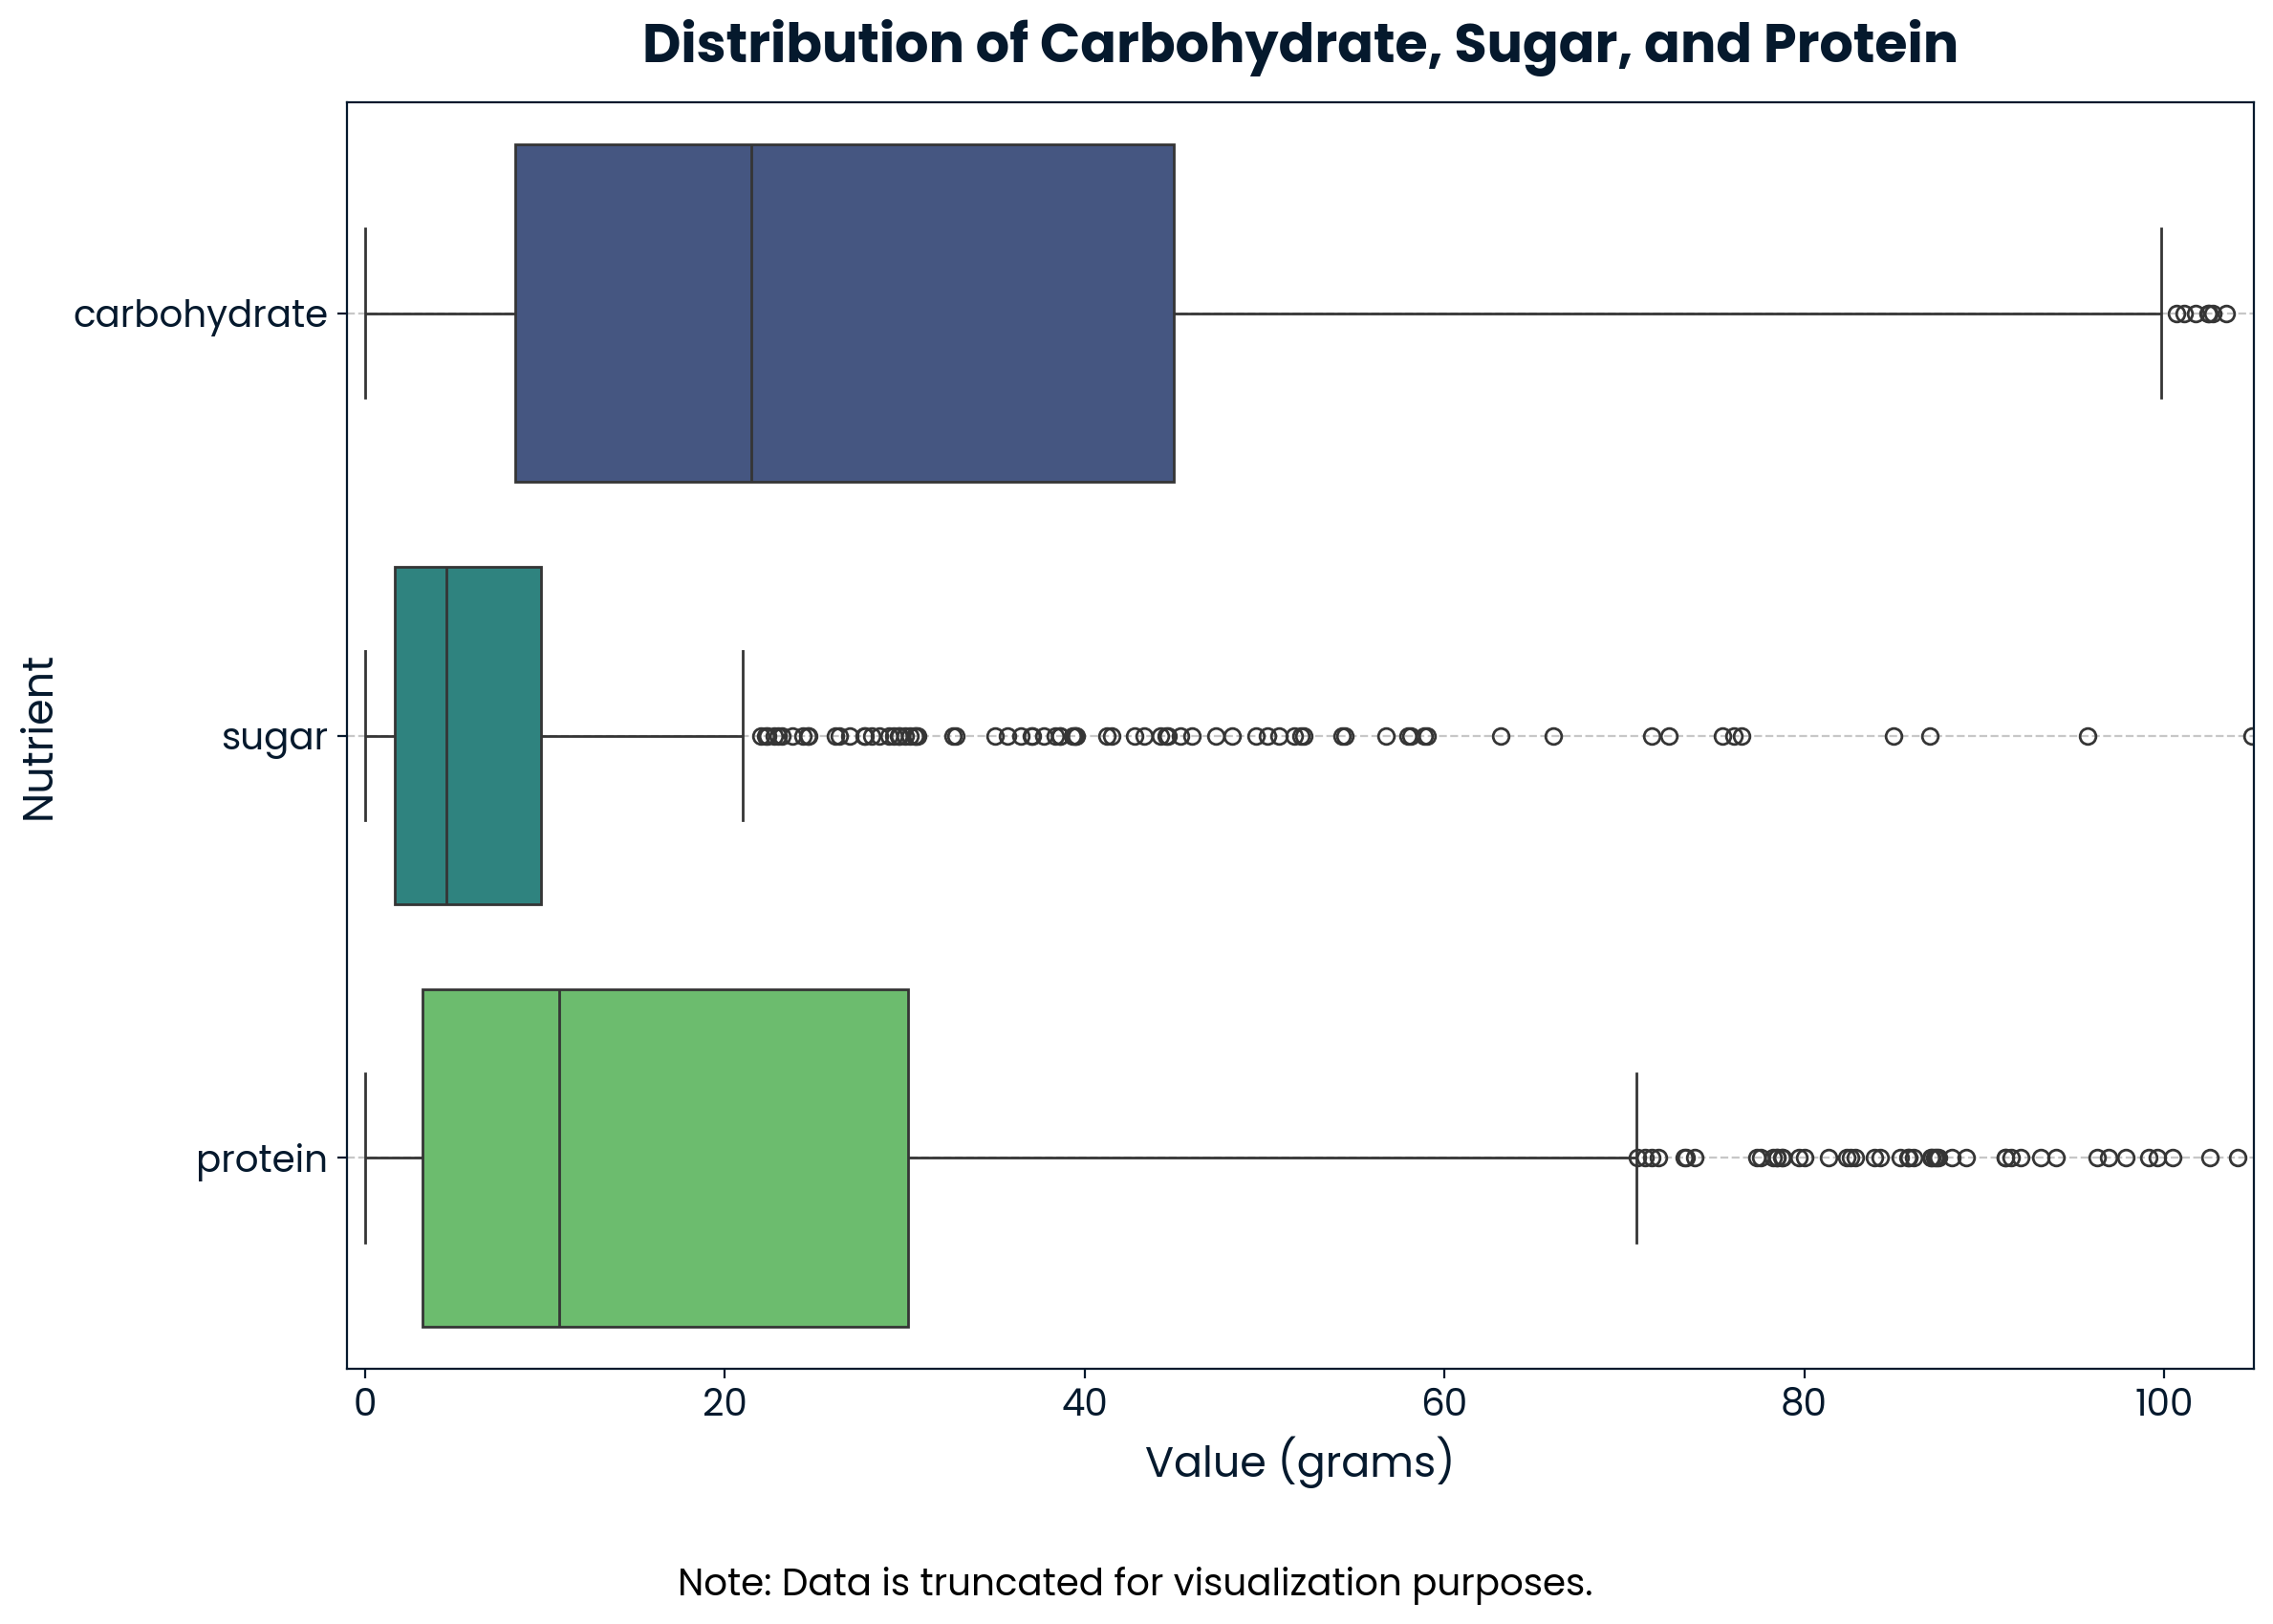

In [49]:
nutritional_columns = ['carbohydrate', 'sugar', 'protein']


df_melted = df.melt(value_vars=nutritional_columns, var_name='Nutrient', value_name='Value')


plt.figure(figsize=(12, 8))
sns.boxplot(data=df_melted, y='Nutrient', x='Value', palette='viridis')
plt.title('Distribution of Carbohydrate, Sugar, and Protein', fontsize=20, fontweight='bold', pad=15)
plt.xlabel('Value (grams)', fontsize=16)
plt.ylabel('Nutrient', fontsize=16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlim(-1,105)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.figtext(0.5, -0.05, 'Note: Data is truncated for visualization purposes.', 
            wrap=True, horizontalalignment='center', fontsize=14, color='black')
plt.tight_layout()
plt.show()

The boxplot shows the distribution of carbohydrate, sugar, and protein values in the dataset. Carbohydrates have the highest variability and a wider range, while protein exhibits a moderate range. Sugar, on the other hand, is more concentrated with lower values and numerous outliers, indicating occasional recipes with unusually high sugar content. This highlights the distinct nutritional profiles across the dataset.

### Multi-Variate Visualizations
At this point, I set to understand the relationships among variables and how they affect each other, many were tested, only the most insightful will be presented.

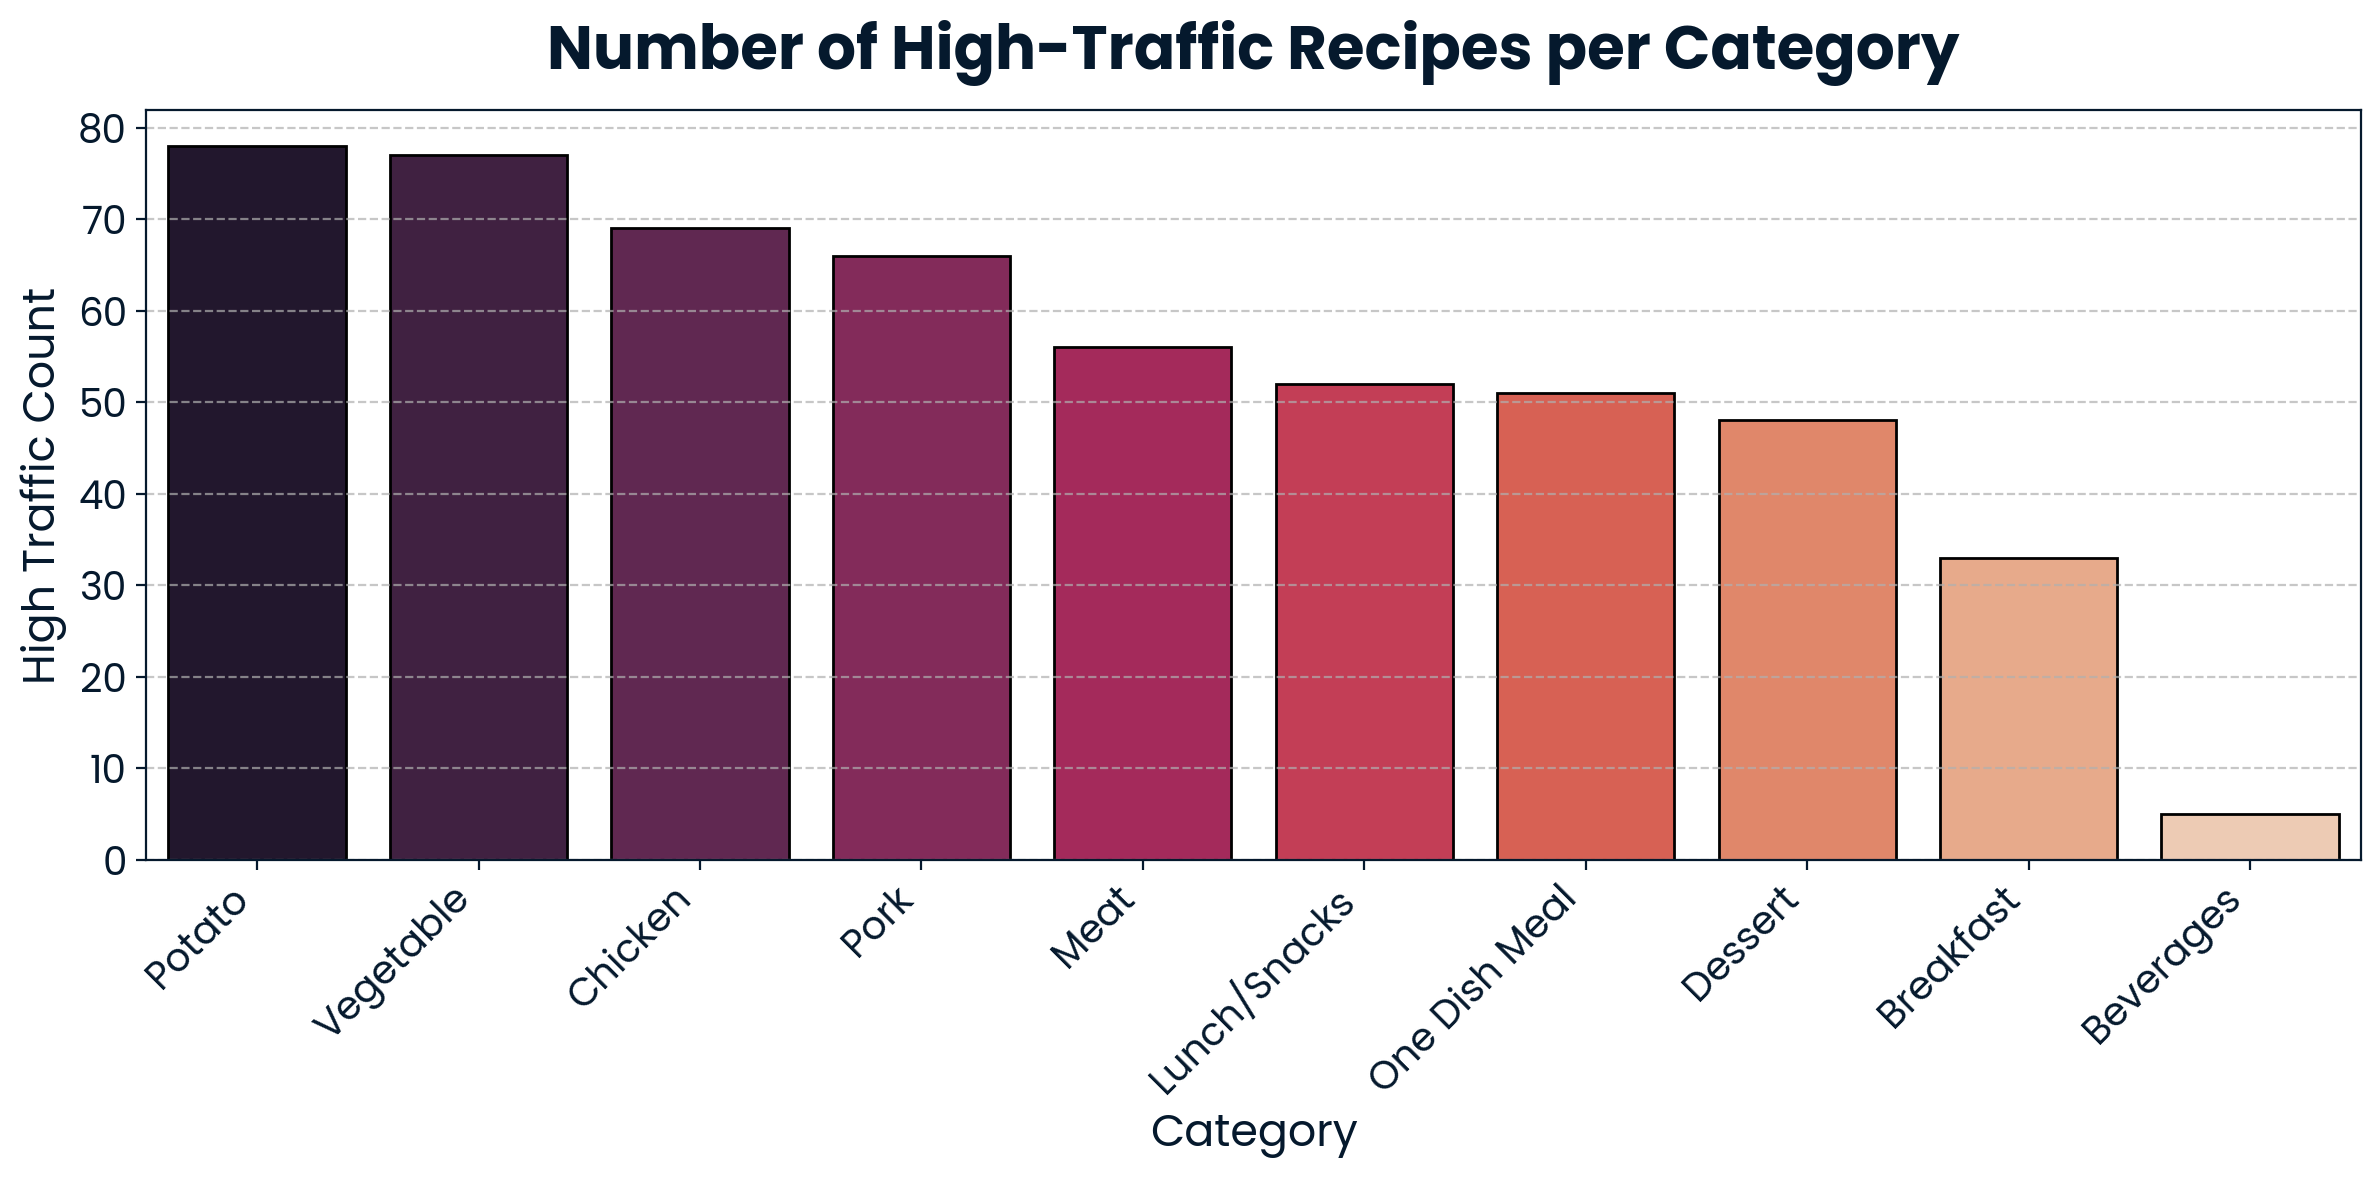

In [50]:
columns = ['category', 'high_traffic']

grouped = df.groupby(columns[0])[columns[1]].sum().reset_index()
grouped.columns = ['Category', 'High Traffic Count']

grouped = grouped.sort_values(by='High Traffic Count', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=grouped,
    x='Category',
    y='High Traffic Count',
    palette='rocket',
    edgecolor='black',
    order=grouped['Category']  # Ensure order matches sorted df
)

plt.title('Number of High-Traffic Recipes per Category', fontsize=22, fontweight='bold', pad=15)
plt.xlabel('Category', fontsize=16)
plt.ylabel('High Traffic Count', fontsize=16)
plt.xticks(rotation=45, fontsize = 14, ha = 'right')
plt.yticks(fontsize = 14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


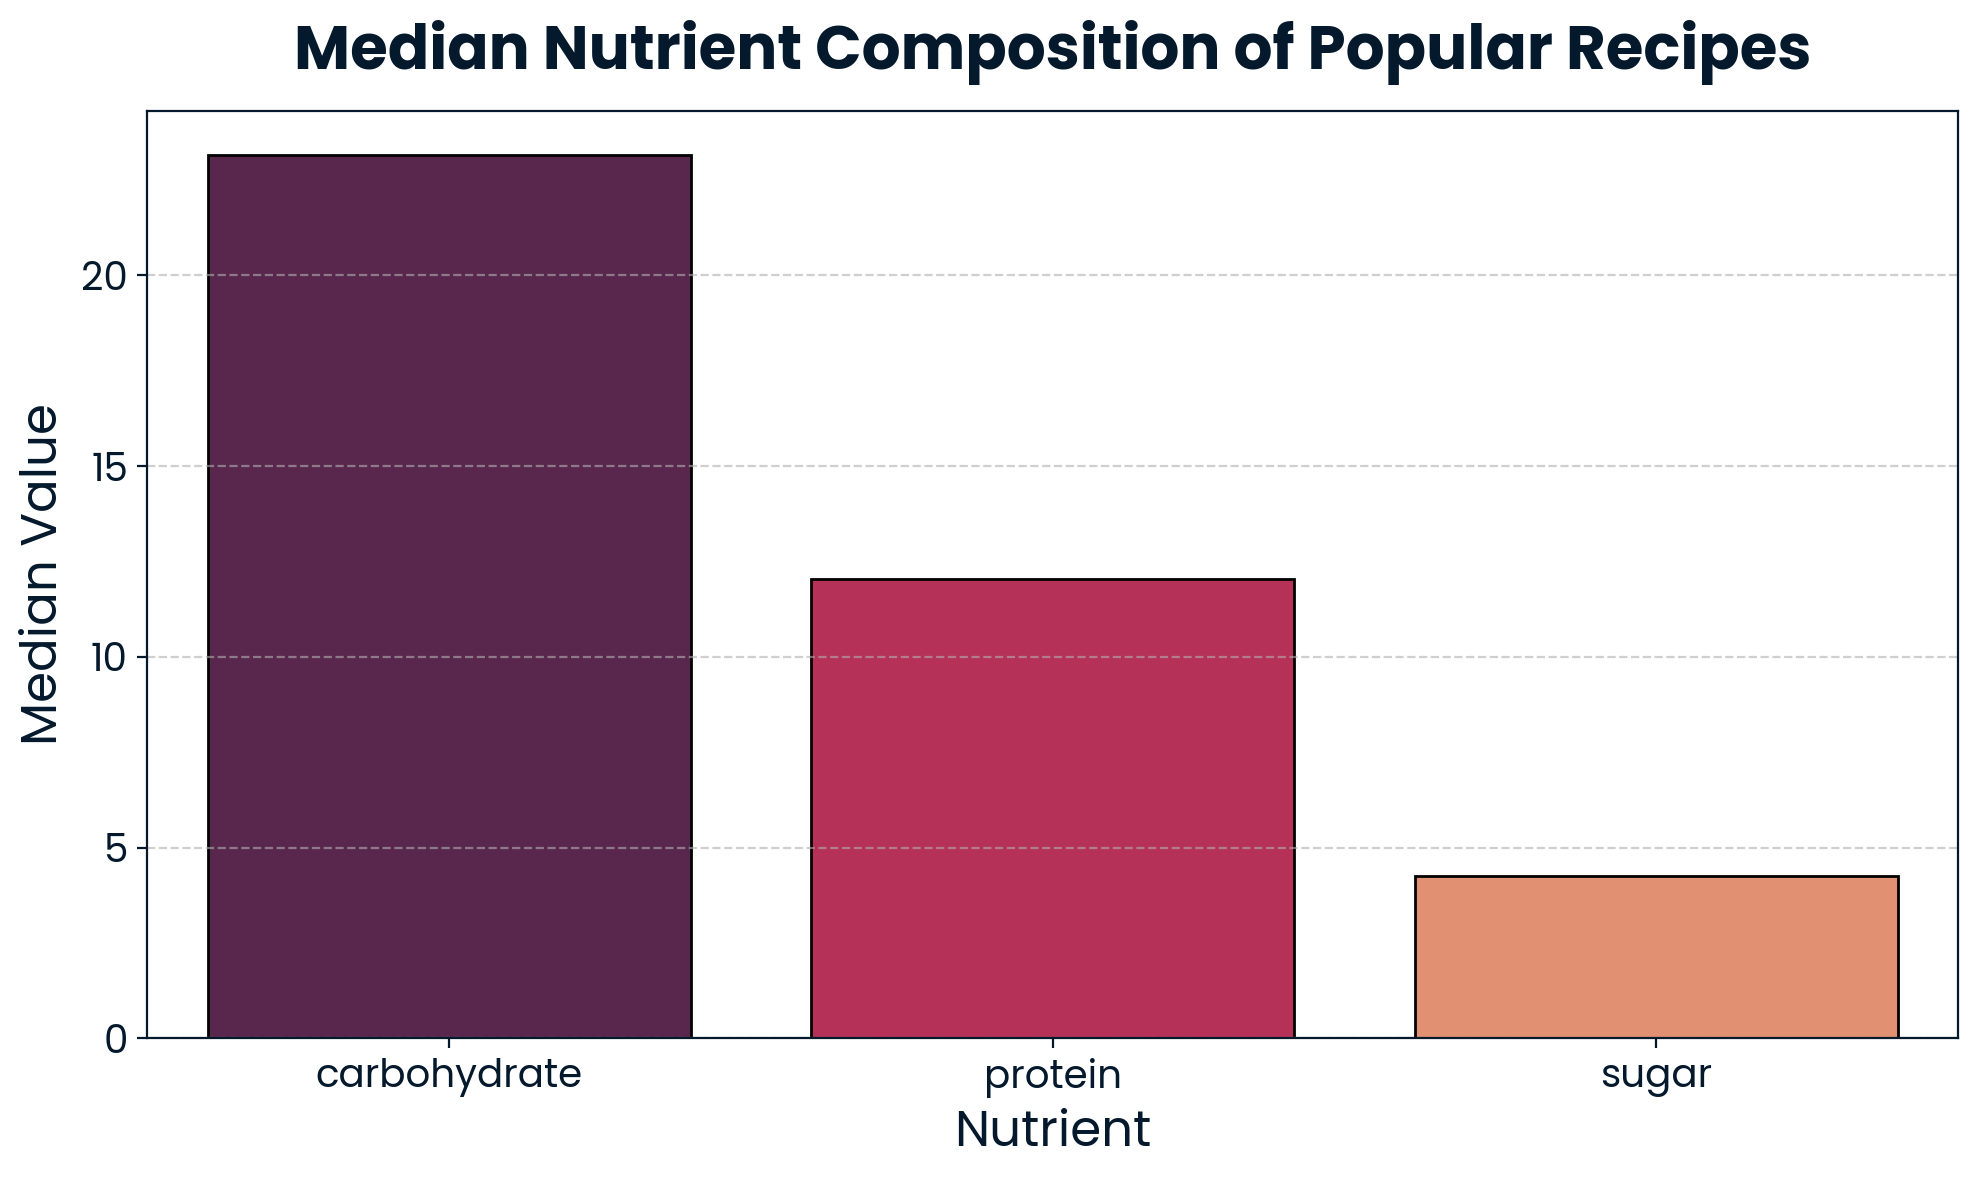

In [51]:
popular_recipes = df[df['high_traffic'] == 1]


nutritional_columns = ['carbohydrate', 'protein', 'sugar']


median_nutrients = popular_recipes[nutritional_columns].median().reset_index()
median_nutrients.columns = ['Nutrient', 'Median Value']


plt.figure(figsize=(10, 6))
sns.barplot(
    data=median_nutrients, 
    x='Nutrient', 
    y='Median Value', 
    palette='rocket', 
    edgecolor='black'  
)
plt.title('Median Nutrient Composition of Popular Recipes', fontsize=22, fontweight='bold', pad=15)
plt.xlabel('Nutrient', fontsize=18)
plt.ylabel('Median Value', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### Median Nutritional Composition by Category (Popular Recipes)

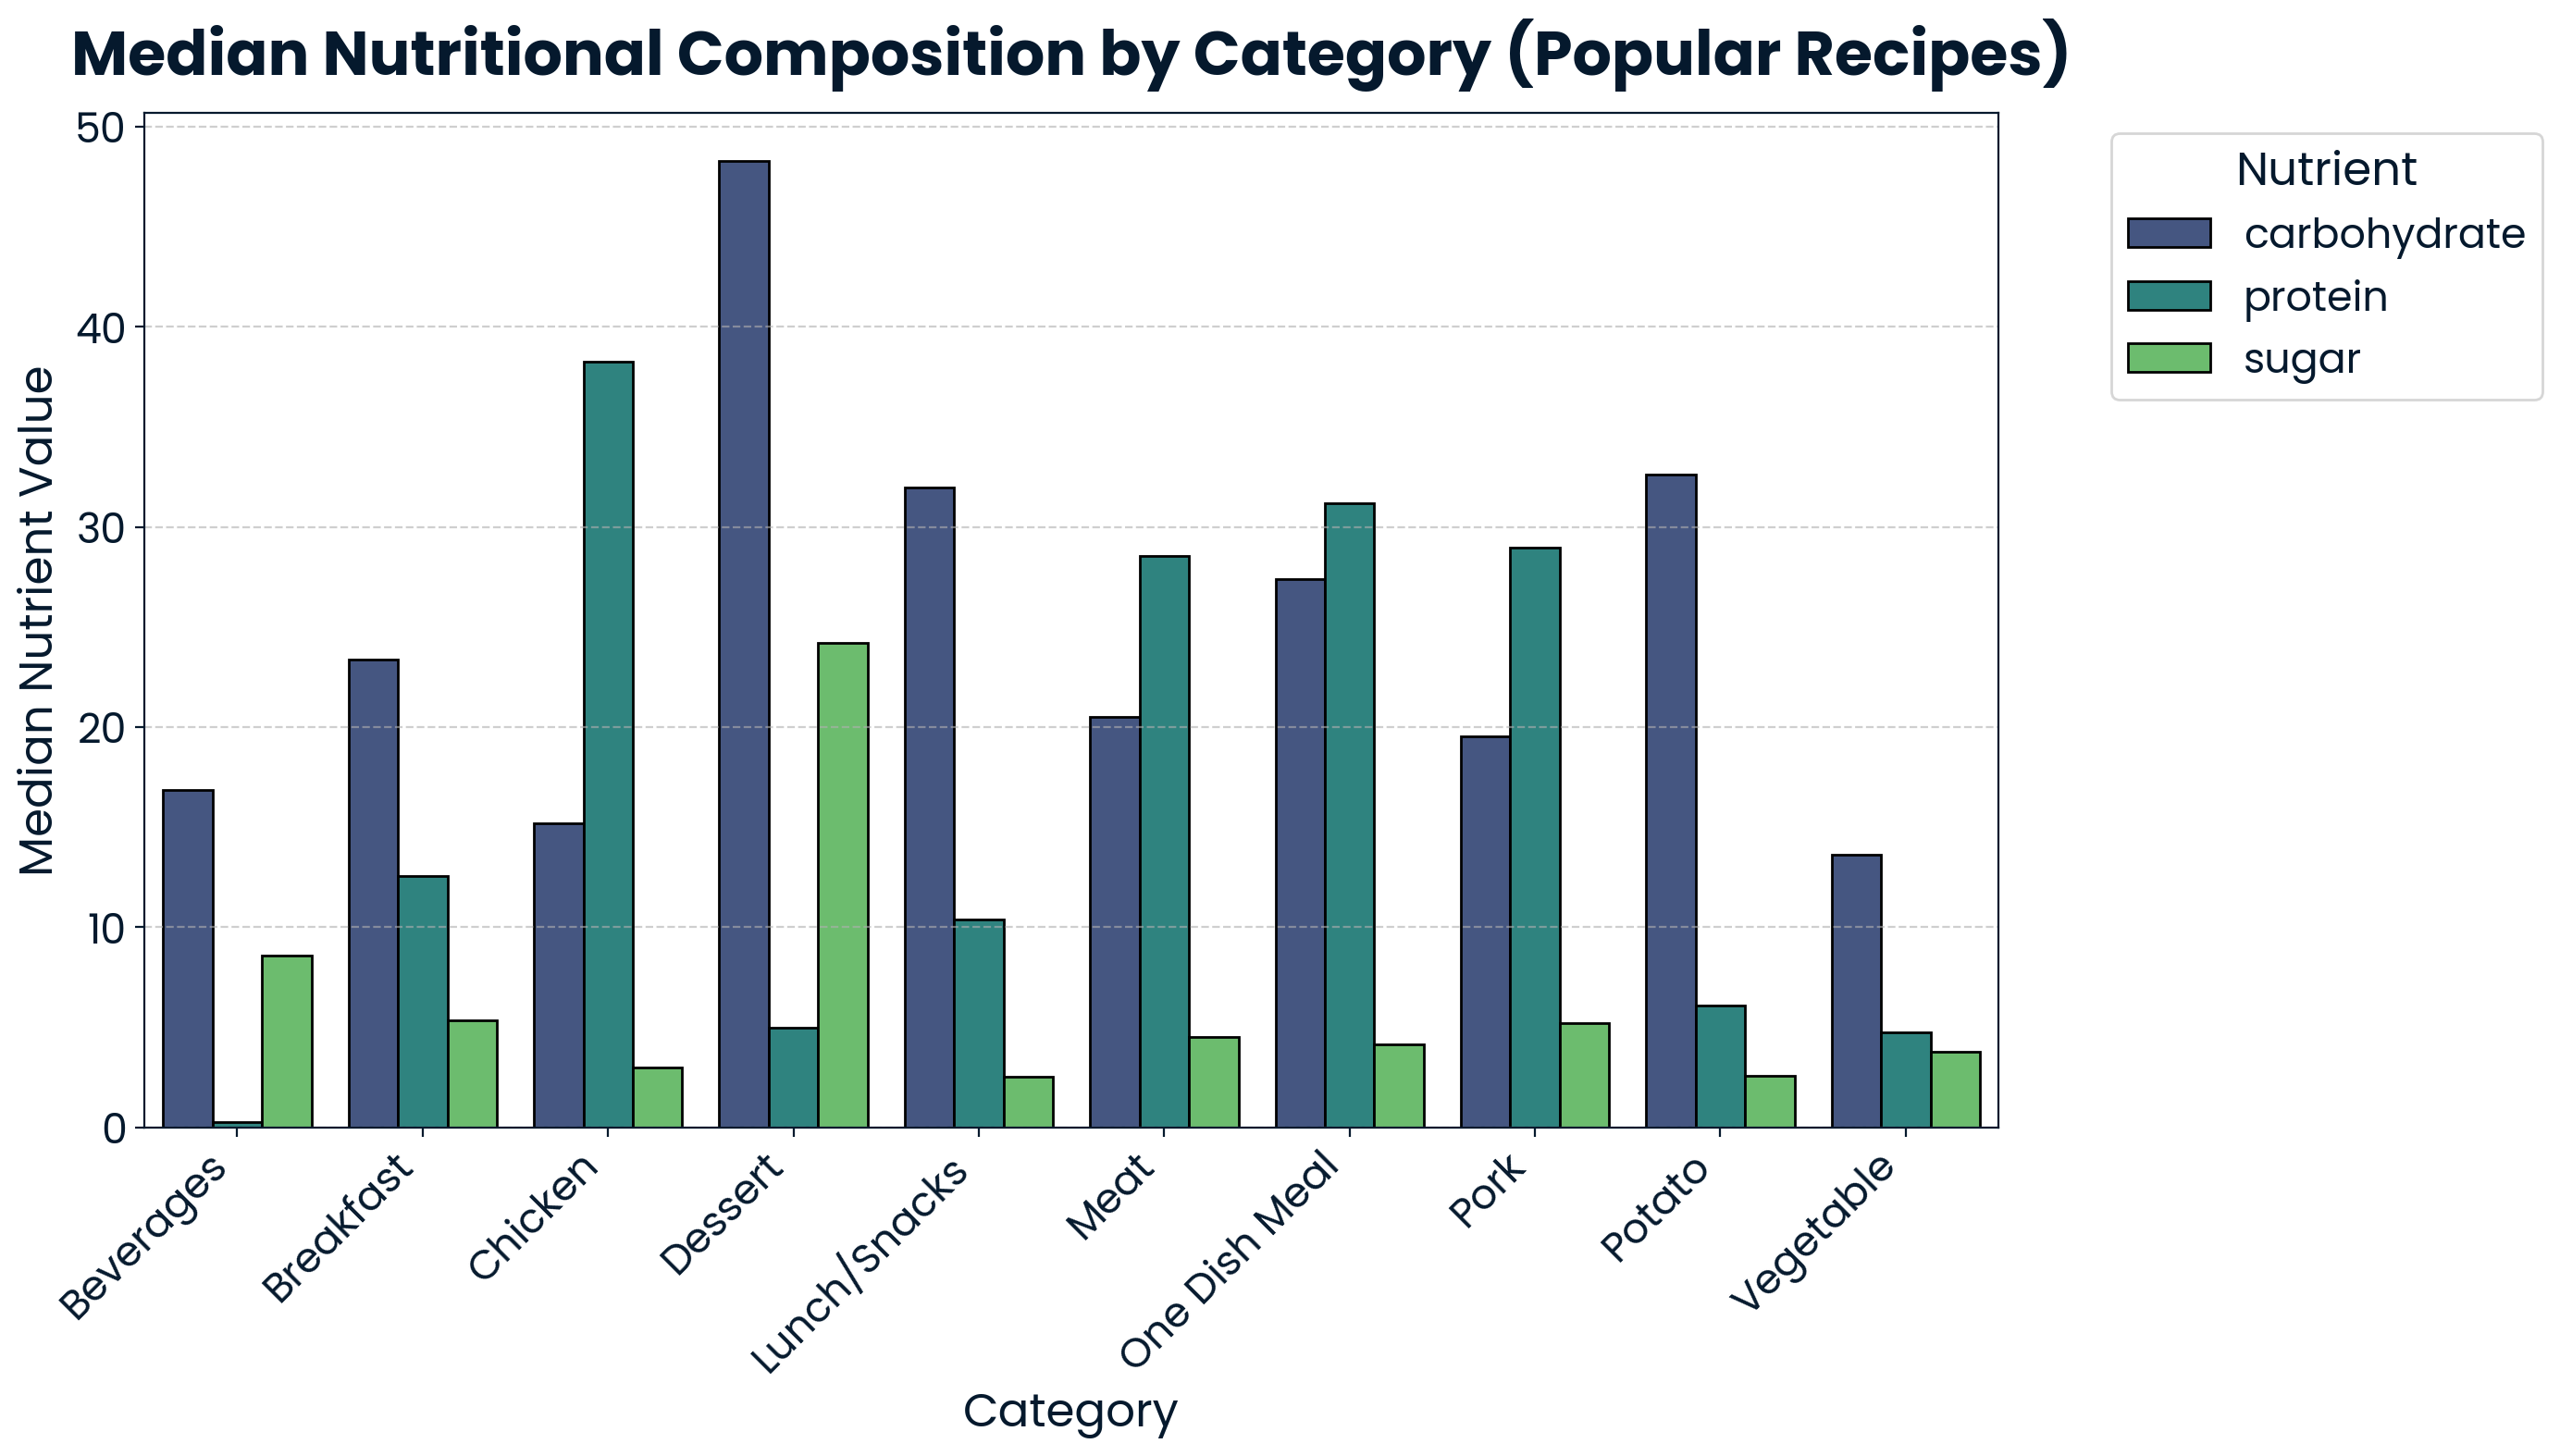

In [52]:
popular_recipes = df[df['high_traffic'] == 1]


nutritional_columns = ['carbohydrate', 'sugar', 'protein']
melted = popular_recipes.melt(id_vars=['category'], value_vars=nutritional_columns, var_name='Nutrient', value_name='Value')


median_data = melted.groupby(['category', 'Nutrient'])['Value'].median().reset_index()


plt.figure(figsize=(14, 8))
sns.barplot(
    data=median_data, 
    x='category', 
    y='Value', 
    hue='Nutrient', 
    palette='viridis', 
    edgecolor='black'  
)
plt.title('Median Nutritional Composition by Category (Popular Recipes)', fontsize=24, fontweight='bold', pad=15)
plt.xlabel('Category', fontsize=18)
plt.ylabel('Median Nutrient Value', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Nutrient', title_fontsize = 18 ,bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

The chart shows the median nutritional composition of popular recipes by category. "Dessert" has the highest median carbohydrates, reflecting its sweet nature, while "Chicken Breast" and "Meat" dominate in protein content. Categories like "Vegetable" and "Potato" show balanced carbohydrates and protein. Sugar levels are generally low except in desserts and snacks, highlighting the unique nutritional focus of each category.

## Model Development 
On this section, I describe the type of problem and the models chosen (the baseline and the comparison model). 

### Type of problem and Chosen Success Metric
This is a **classification problem** because the target variable, high_traffic, is binary, with values indicating whether a recipe is "High" or "Low" traffic. The goal is to predict which category a recipe belongs to based on its features (e.g., nutrients, servings, and category). Since the output is discrete and categorical, it aligns with the definition of a classification task rather than regression, which deals with continuous outcomes.

**Metric to Follow:**

Focusing on **precision** mainly is critical for the business goals because they directly address the challenge of correctly identifying high-traffic recipes while minimizing showing unpopular recipes. This balance ensures resources are allocated effectively, while simultaneously meeting customer demand and optimizing business performance. By selecting an appropriate threshold based on precision that doesn't penalize the other metrics as much, the business aligns its predictive model with operational and financial goals.

### Methodology Employed
The data was preprocessed by handling missing values, encoding categorical variables using one-hot encoding, and scaling numeric features to ensure compatibility with the Logistic Regression model. The model's performance was evaluated on an unseen test set using metrics such as accuracy, precision, recall, and ROC-AUC to provide an unbiased measure of its effectiveness in predicting high-traffic recipes.

### Baseline: Logistic Regression 

Confusion Matrix (Test Set):
 [[55 17]
 [23 84]]


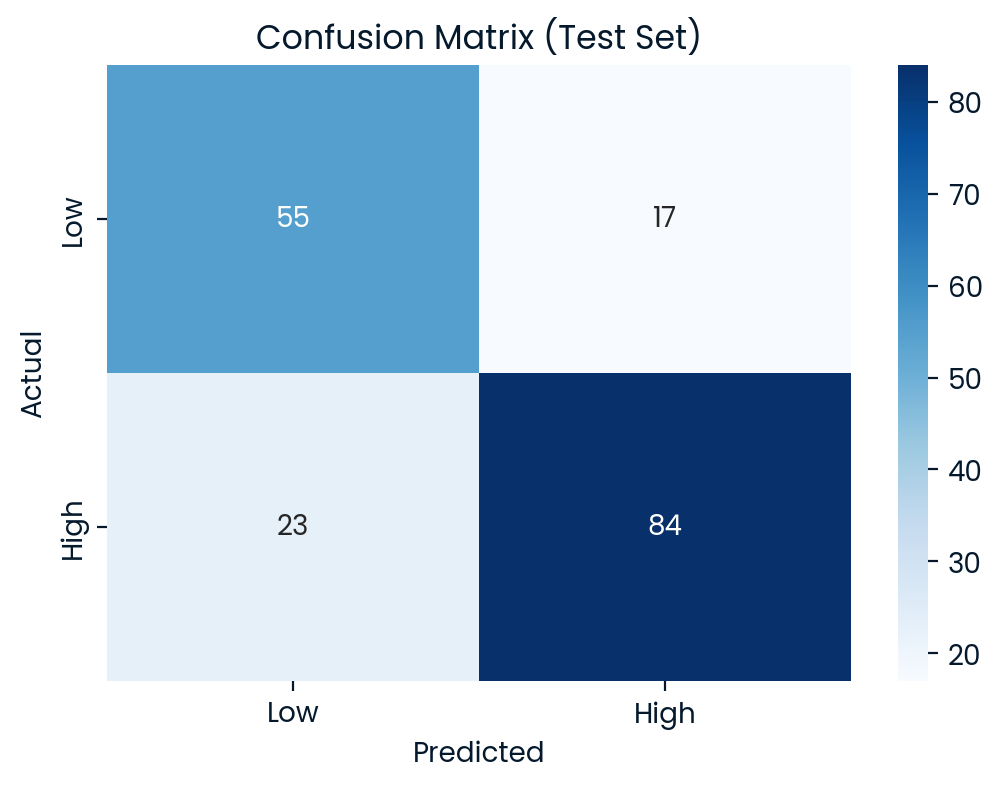

Accuracy (Test): 0.78
Precision (Test): 0.83
Recall (Test): 0.79
F1 Score (Test): 0.81
ROC-AUC (Test): 0.83


In [53]:
# One-hot encoding the 'category' column
X = pd.get_dummies(df.drop(columns=['high_traffic', 'recipe']), columns=['category'], drop_first=True)

# Target Variable
y = df['high_traffic']

# Data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Scaling the numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# LR Model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Predict probabilities to get ROC-AUC metric and to also be able to later optimize and play around with the threshold 
y_pred_prob_test = model.predict_proba(X_test_scaled)[:, 1]
threshold = 0.455 # Optimal Found Threshold (Where precision >= 0.80)
y_pred_binary_test = (y_pred_prob_test >= threshold).astype(int)

# Confusion Matrix
cm_test = confusion_matrix(y_test, y_pred_binary_test)
print("Confusion Matrix (Test Set):\n", cm_test)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Test Set)")
plt.show()

# Classification Metrics
accuracy_test = accuracy_score(y_test, y_pred_binary_test)
precision_test = precision_score(y_test, y_pred_binary_test)
recall_test = recall_score(y_test, y_pred_binary_test)
f1_test = f1_score(y_test, y_pred_binary_test)
roc_auc_test = roc_auc_score(y_test, y_pred_prob_test)

# Print metrics
print(f"Accuracy (Test): {accuracy_test:.2f}")
print(f"Precision (Test): {precision_test:.2f}")
print(f"Recall (Test): {recall_test:.2f}")
print(f"F1 Score (Test): {f1_test:.2f}")
print(f"ROC-AUC (Test): {roc_auc_test:.2f}")


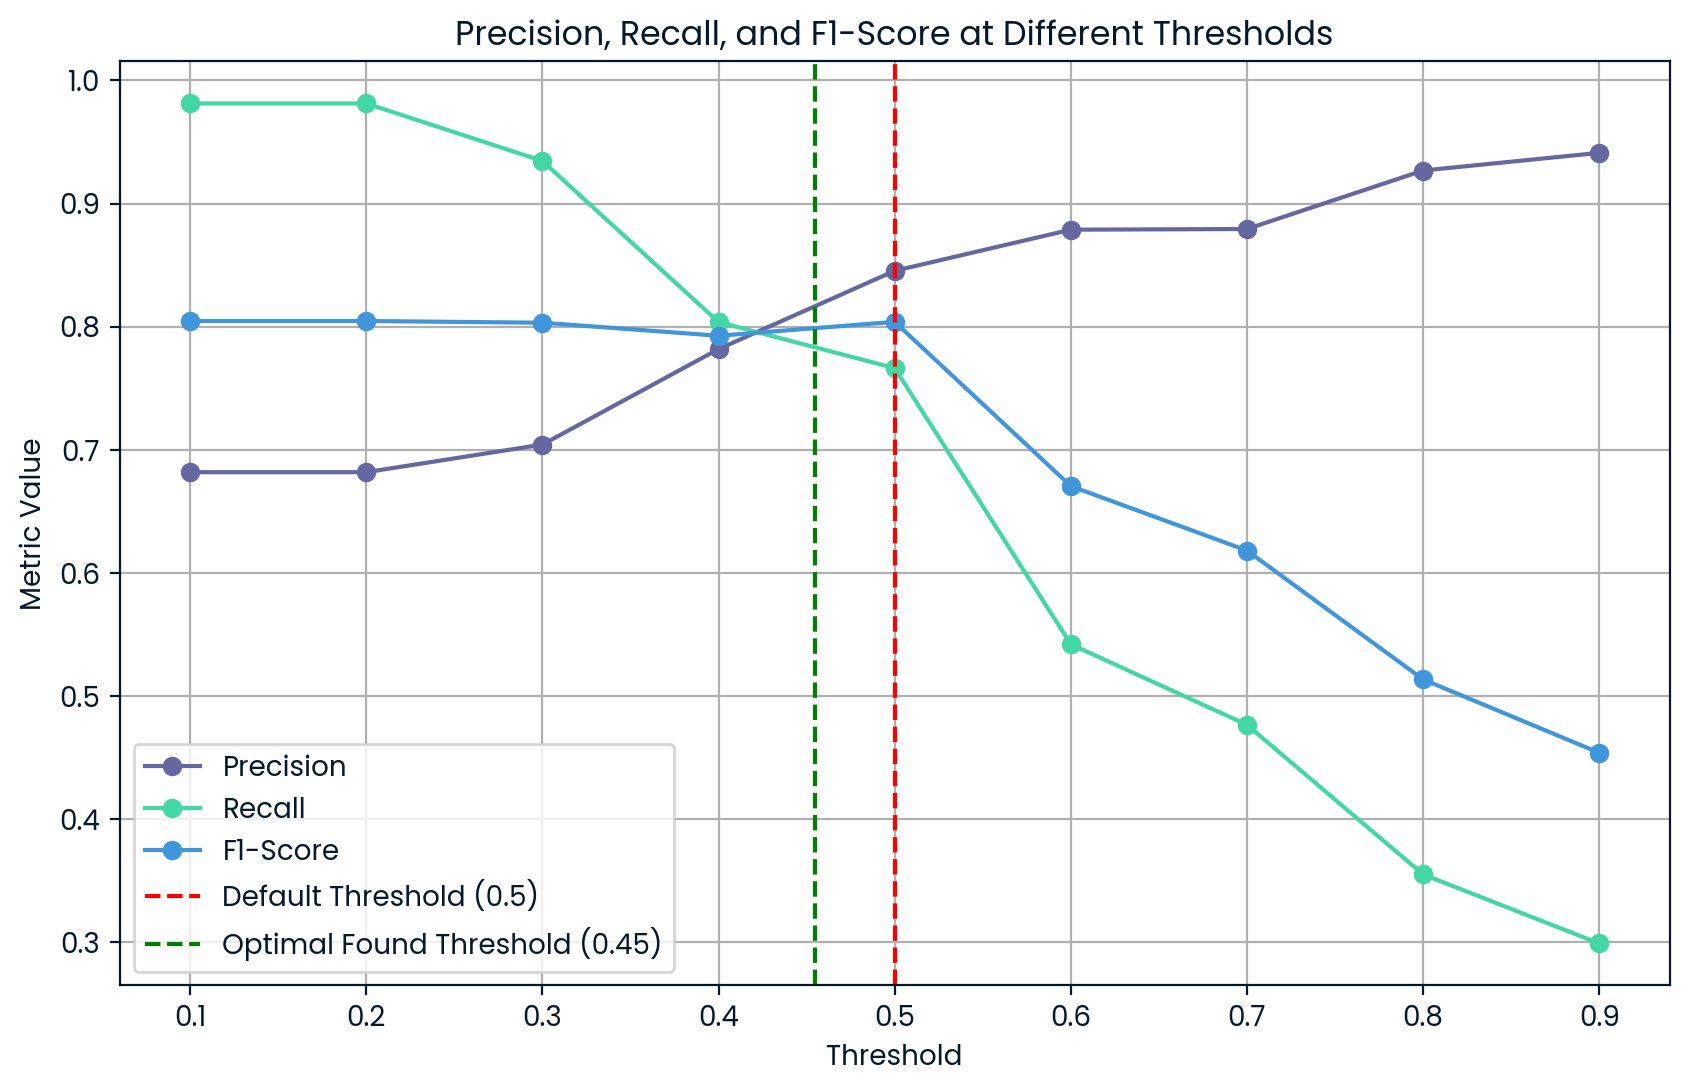

   Threshold  Precision    Recall  F1-Score
0        0.1   0.681818  0.981308  0.804598
1        0.2   0.681818  0.981308  0.804598
2        0.3   0.704225  0.934579  0.803213
3        0.4   0.781818  0.803738  0.792627
4        0.5   0.845361  0.766355  0.803922
5        0.6   0.878788  0.542056  0.670520
6        0.7   0.879310  0.476636  0.618182
7        0.8   0.926829  0.355140  0.513514
8        0.9   0.941176  0.299065  0.453901


In [54]:
# Evaluating performance across different thresholds
thresholds = np.arange(0.1, 1.0, 0.1)
metrics = []

for threshold in thresholds:
    y_pred_binary_test = (y_pred_prob_test >= threshold).astype(int)
    precision = precision_score(y_test, y_pred_binary_test)
    recall = recall_score(y_test, y_pred_binary_test)
    f1 = f1_score(y_test, y_pred_binary_test)
    metrics.append({'Threshold': threshold, 'Precision': precision, 'Recall': recall, 'F1-Score': f1})

metrics_df = pd.DataFrame(metrics)

# Plot metrics
plt.figure(figsize=(10, 6))
plt.plot(metrics_df['Threshold'], metrics_df['Precision'], label='Precision', marker='o')
plt.plot(metrics_df['Threshold'], metrics_df['Recall'], label='Recall', marker='o')
plt.plot(metrics_df['Threshold'], metrics_df['F1-Score'], label='F1-Score', marker='o')
plt.axvline(x=0.5, color='red', linestyle='--', label='Default Threshold (0.5)')
plt.axvline(x=0.455, color='green', linestyle='--', label='Optimal Found Threshold (0.45)')
plt.xlabel('Threshold')
plt.ylabel('Metric Value')
plt.title('Precision, Recall, and F1-Score at Different Thresholds')
plt.legend()
plt.grid()
plt.show() 

# Display metrics df
print(metrics_df)


#### Model's Performance on Unseen Data
The Logistic Regression model was optimized to align with the business's goal of accurately predicting popular recipes while minimizing the chance of showing unpopular ones. By fine-tuning the threshold to 0.455, the model achieved a precision of 83%, ensuring that most recipes predicted as popular are indeed popular. This directly supports the goal of minimizing false positives, where unpopular recipes could be incorrectly recommended.

Additionally, the model maintains a recall of 79%, meaning it successfully identifies the majority of popular recipes while striking a balance with precision. The F1-score of 81% highlights the model's overall effectiveness in balancing these trade-offs. With an ROC-AUC of 83%, the model demonstrates strong discriminatory power between popular and unpopular recipes.

By focusing on precision while maintaining a high recall, this model effectively meets the business's dual objective of prioritizing accurate recommendations of popular recipes and avoiding the misclassification of unpopular ones. This performance ensures that the business can make confident and reliable recipe recommendations to its subscribers.

### Comparison Model: Random Forest Classifier
The chosen model for comparison against the Logistic Regression if the Random Forest Classifier, this model is a little more complex and has proven to be very effective in classification tasks. let's see how it performs.

Confusion Matrix (Test Set):
 [[53 19]
 [26 81]]


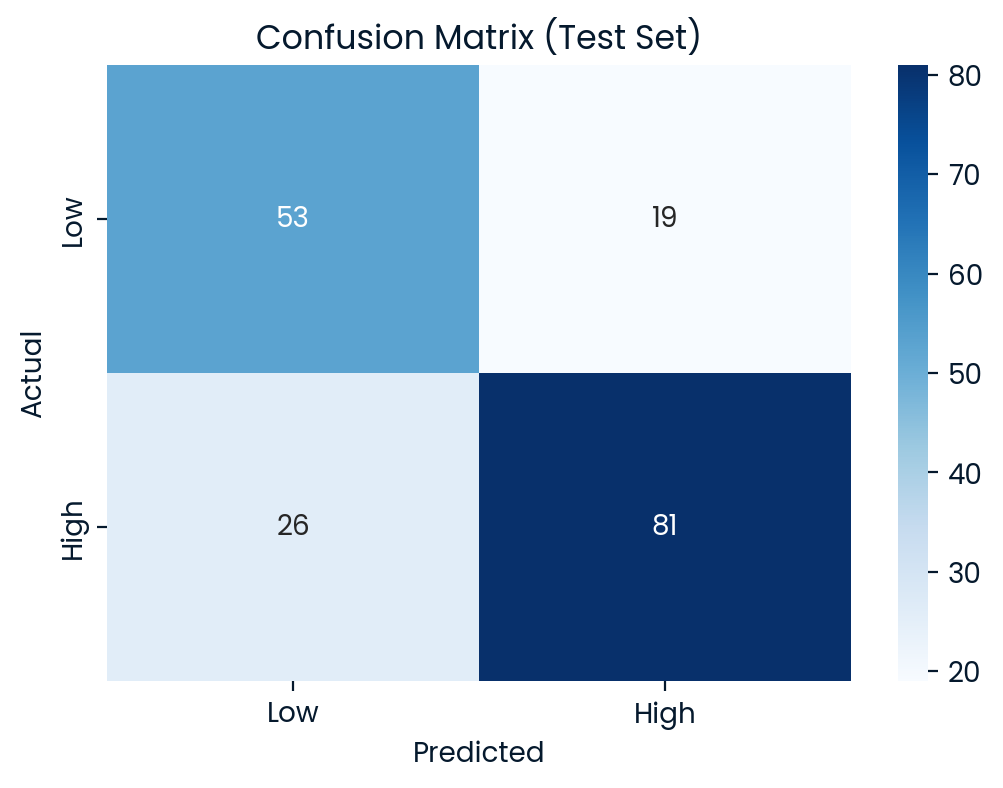

Accuracy (Test): 0.75
Precision (Test): 0.81
Recall (Test): 0.76
F1 Score (Test): 0.78
ROC-AUC (Test): 0.80


In [55]:
# One-hot encoding the 'category' column
X = pd.get_dummies(df.drop(columns=['high_traffic', 'recipe']), columns=['category'], drop_first=True)

# Target variable
y = df['high_traffic']

# Train test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# RFC
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=None)
rf_model.fit(X_train, y_train)

# Predicting probas
y_pred_prob_test = rf_model.predict_proba(X_test)[:, 1]  

threshold = 0.5  # Optimal Found Threshold (Where precision >= 0.80)
y_pred_binary_test = (y_pred_prob_test >= threshold).astype(int)

# Confusion Matrix
cm_test = confusion_matrix(y_test, y_pred_binary_test)
print("Confusion Matrix (Test Set):\n", cm_test)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Test Set)")
plt.show()

# Classification Metrics
accuracy_test = accuracy_score(y_test, y_pred_binary_test)
precision_test = precision_score(y_test, y_pred_binary_test)
recall_test = recall_score(y_test, y_pred_binary_test)
f1_test = f1_score(y_test, y_pred_binary_test)
roc_auc_test = roc_auc_score(y_test, y_pred_prob_test)

# Print metrics
print(f"Accuracy (Test): {accuracy_test:.2f}")
print(f"Precision (Test): {precision_test:.2f}")
print(f"Recall (Test): {recall_test:.2f}")
print(f"F1 Score (Test): {f1_test:.2f}")
print(f"ROC-AUC (Test): {roc_auc_test:.2f}")


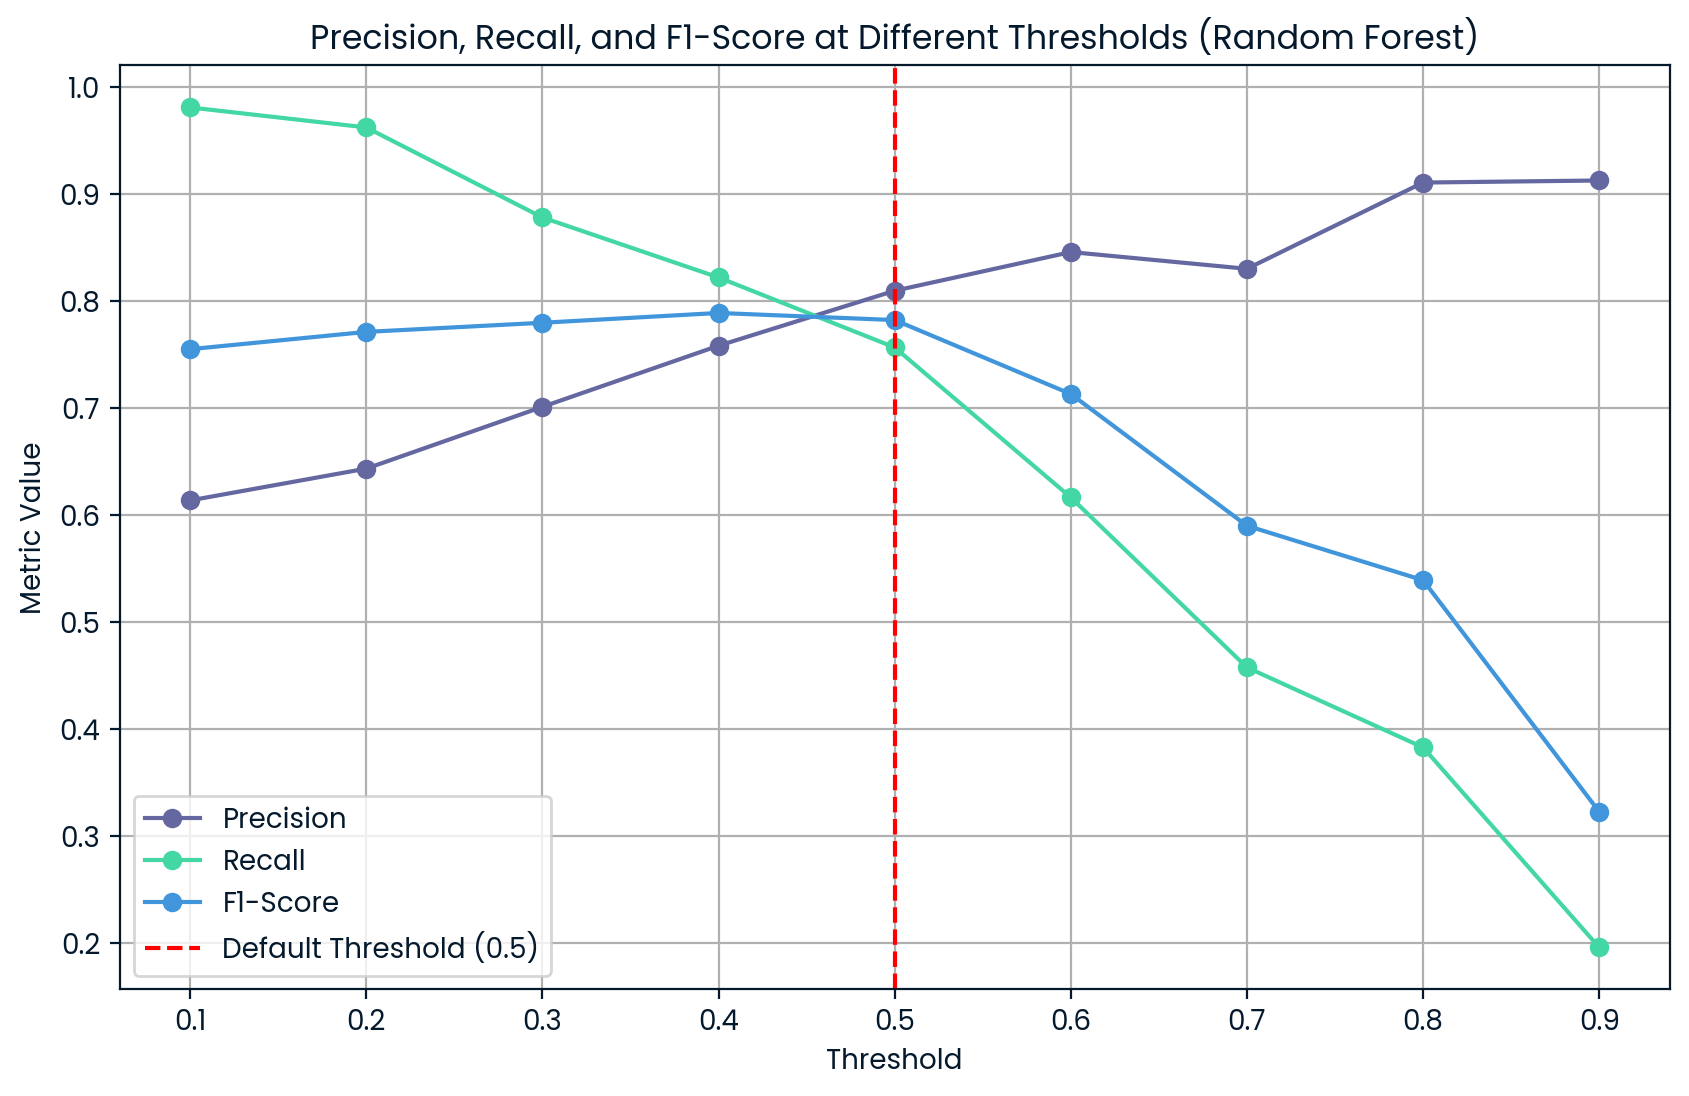

   Threshold  Precision    Recall  F1-Score
0        0.1   0.614035  0.981308  0.755396
1        0.2   0.643750  0.962617  0.771536
2        0.3   0.701493  0.878505  0.780083
3        0.4   0.758621  0.822430  0.789238
4        0.5   0.810000  0.757009  0.782609
5        0.6   0.846154  0.616822  0.713514
6        0.7   0.830508  0.457944  0.590361
7        0.8   0.911111  0.383178  0.539474
8        0.9   0.913043  0.196262  0.323077


In [56]:
# Evaluate performance across thresholds
thresholds = np.arange(0.1, 1.0, 0.1)
metrics = []

for threshold in thresholds:
    y_pred_binary_test = (y_pred_prob_test >= threshold).astype(int)
    precision = precision_score(y_test, y_pred_binary_test)
    recall = recall_score(y_test, y_pred_binary_test)
    f1 = f1_score(y_test, y_pred_binary_test)
    metrics.append({'Threshold': threshold, 'Precision': precision, 'Recall': recall, 'F1-Score': f1})

metrics_df = pd.DataFrame(metrics)

# Plot metrics
plt.figure(figsize=(10, 6))
plt.plot(metrics_df['Threshold'], metrics_df['Precision'], label='Precision', marker='o')
plt.plot(metrics_df['Threshold'], metrics_df['Recall'], label='Recall', marker='o')
plt.plot(metrics_df['Threshold'], metrics_df['F1-Score'], label='F1-Score', marker='o')
plt.axvline(x=0.5, color='red', linestyle='--', label='Default Threshold (0.5)')
plt.xlabel('Threshold')
plt.ylabel('Metric Value')
plt.title('Precision, Recall, and F1-Score at Different Thresholds (Random Forest)')
plt.legend()
plt.grid()
plt.show()

# Display metrics DataFrame
print(metrics_df)


#### Model's performance
The Random Forest Classifier was optimized to align with the business's goal of accurately predicting popular recipes while minimizing the chance of showing unpopular ones. At the chosen threshold (default 0.5), the model achieved a precision of 81%, ensuring that most recipes predicted as popular are indeed popular. This supports the goal of minimizing false positives, where unpopular recipes could be mistakenly recommended.

The model maintains a recall of 76%, capturing a substantial proportion of popular recipes while prioritizing precision. The resulting F1-score of 78% highlights the model's ability to balance these trade-offs effectively. With an ROC-AUC of 80%, the model demonstrates good discriminatory power in distinguishing between popular and unpopular recipes.

By focusing on precision while maintaining a reasonable recall, the Random Forest Classifier addresses the business's objective of delivering accurate and reliable recipe recommendations while minimizing the risk of showing unpopular recipes. This balance ensures confidence in the model's predictions and supports the overall subscription experience.

### Chosen Model: Logistic Regression
Logistic Regression performs slightly better than the Random Forest Classifier in this case due to its ability to achieve higher precision while maintaining competitive recall and F1-score at a modified threshold. Its simplicity and interpretability make it particularly advantageous for understanding how individual features influence the target variable (popular recipes). This transparency is valuable for deriving actionable insights and aligning model predictions with business objectives.

At the optimized threshold of 0.455, Logistic Regression achieved a precision of 83%, recall of 79%, and F1-score of 81%, striking a better balance compared to Random Forest’s precision of 81%, recall of 76%, and F1-score of 78% at the same threshold. Additionally, Logistic Regression is computationally more efficient and avoids the potential complexity and overfitting often associated with ensemble methods like Random Forest. Its strong performance, interpretability, and suitability for systems requiring real-time predictions make Logistic Regression the preferred choice for addressing this business challenge effectively.

## Feature Importance
The coefficients from the Logistic Regression will be accessed to asses their importance and further understand what the business should focus on.

In [57]:
# Extract feature importance (coefficients) from the Logistic Regression
coefficients = model.coef_[0]  
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients,
    'Importance (Absolute)': abs(coefficients)
}).sort_values(by='Importance (Absolute)', ascending=False)

print(feature_importance)

                   Feature  Coefficient  Importance (Absolute)
13      category_Vegetable     1.696711               1.696711
12         category_Potato     1.506580               1.506580
11           category_Pork     1.257935               1.257935
9            category_Meat     0.951472               0.951472
10  category_One Dish Meal     0.921336               0.921336
7         category_Dessert     0.741926               0.741926
8    category_Lunch/Snacks     0.729116               0.729116
6         category_Chicken     0.701628               0.701628
5       category_Breakfast     0.466146               0.466146
3                  protein     0.086513               0.086513
2                    sugar    -0.078544               0.078544
0                 calories     0.055307               0.055307
1             carbohydrate     0.042545               0.042545
4                 servings     0.034093               0.034093


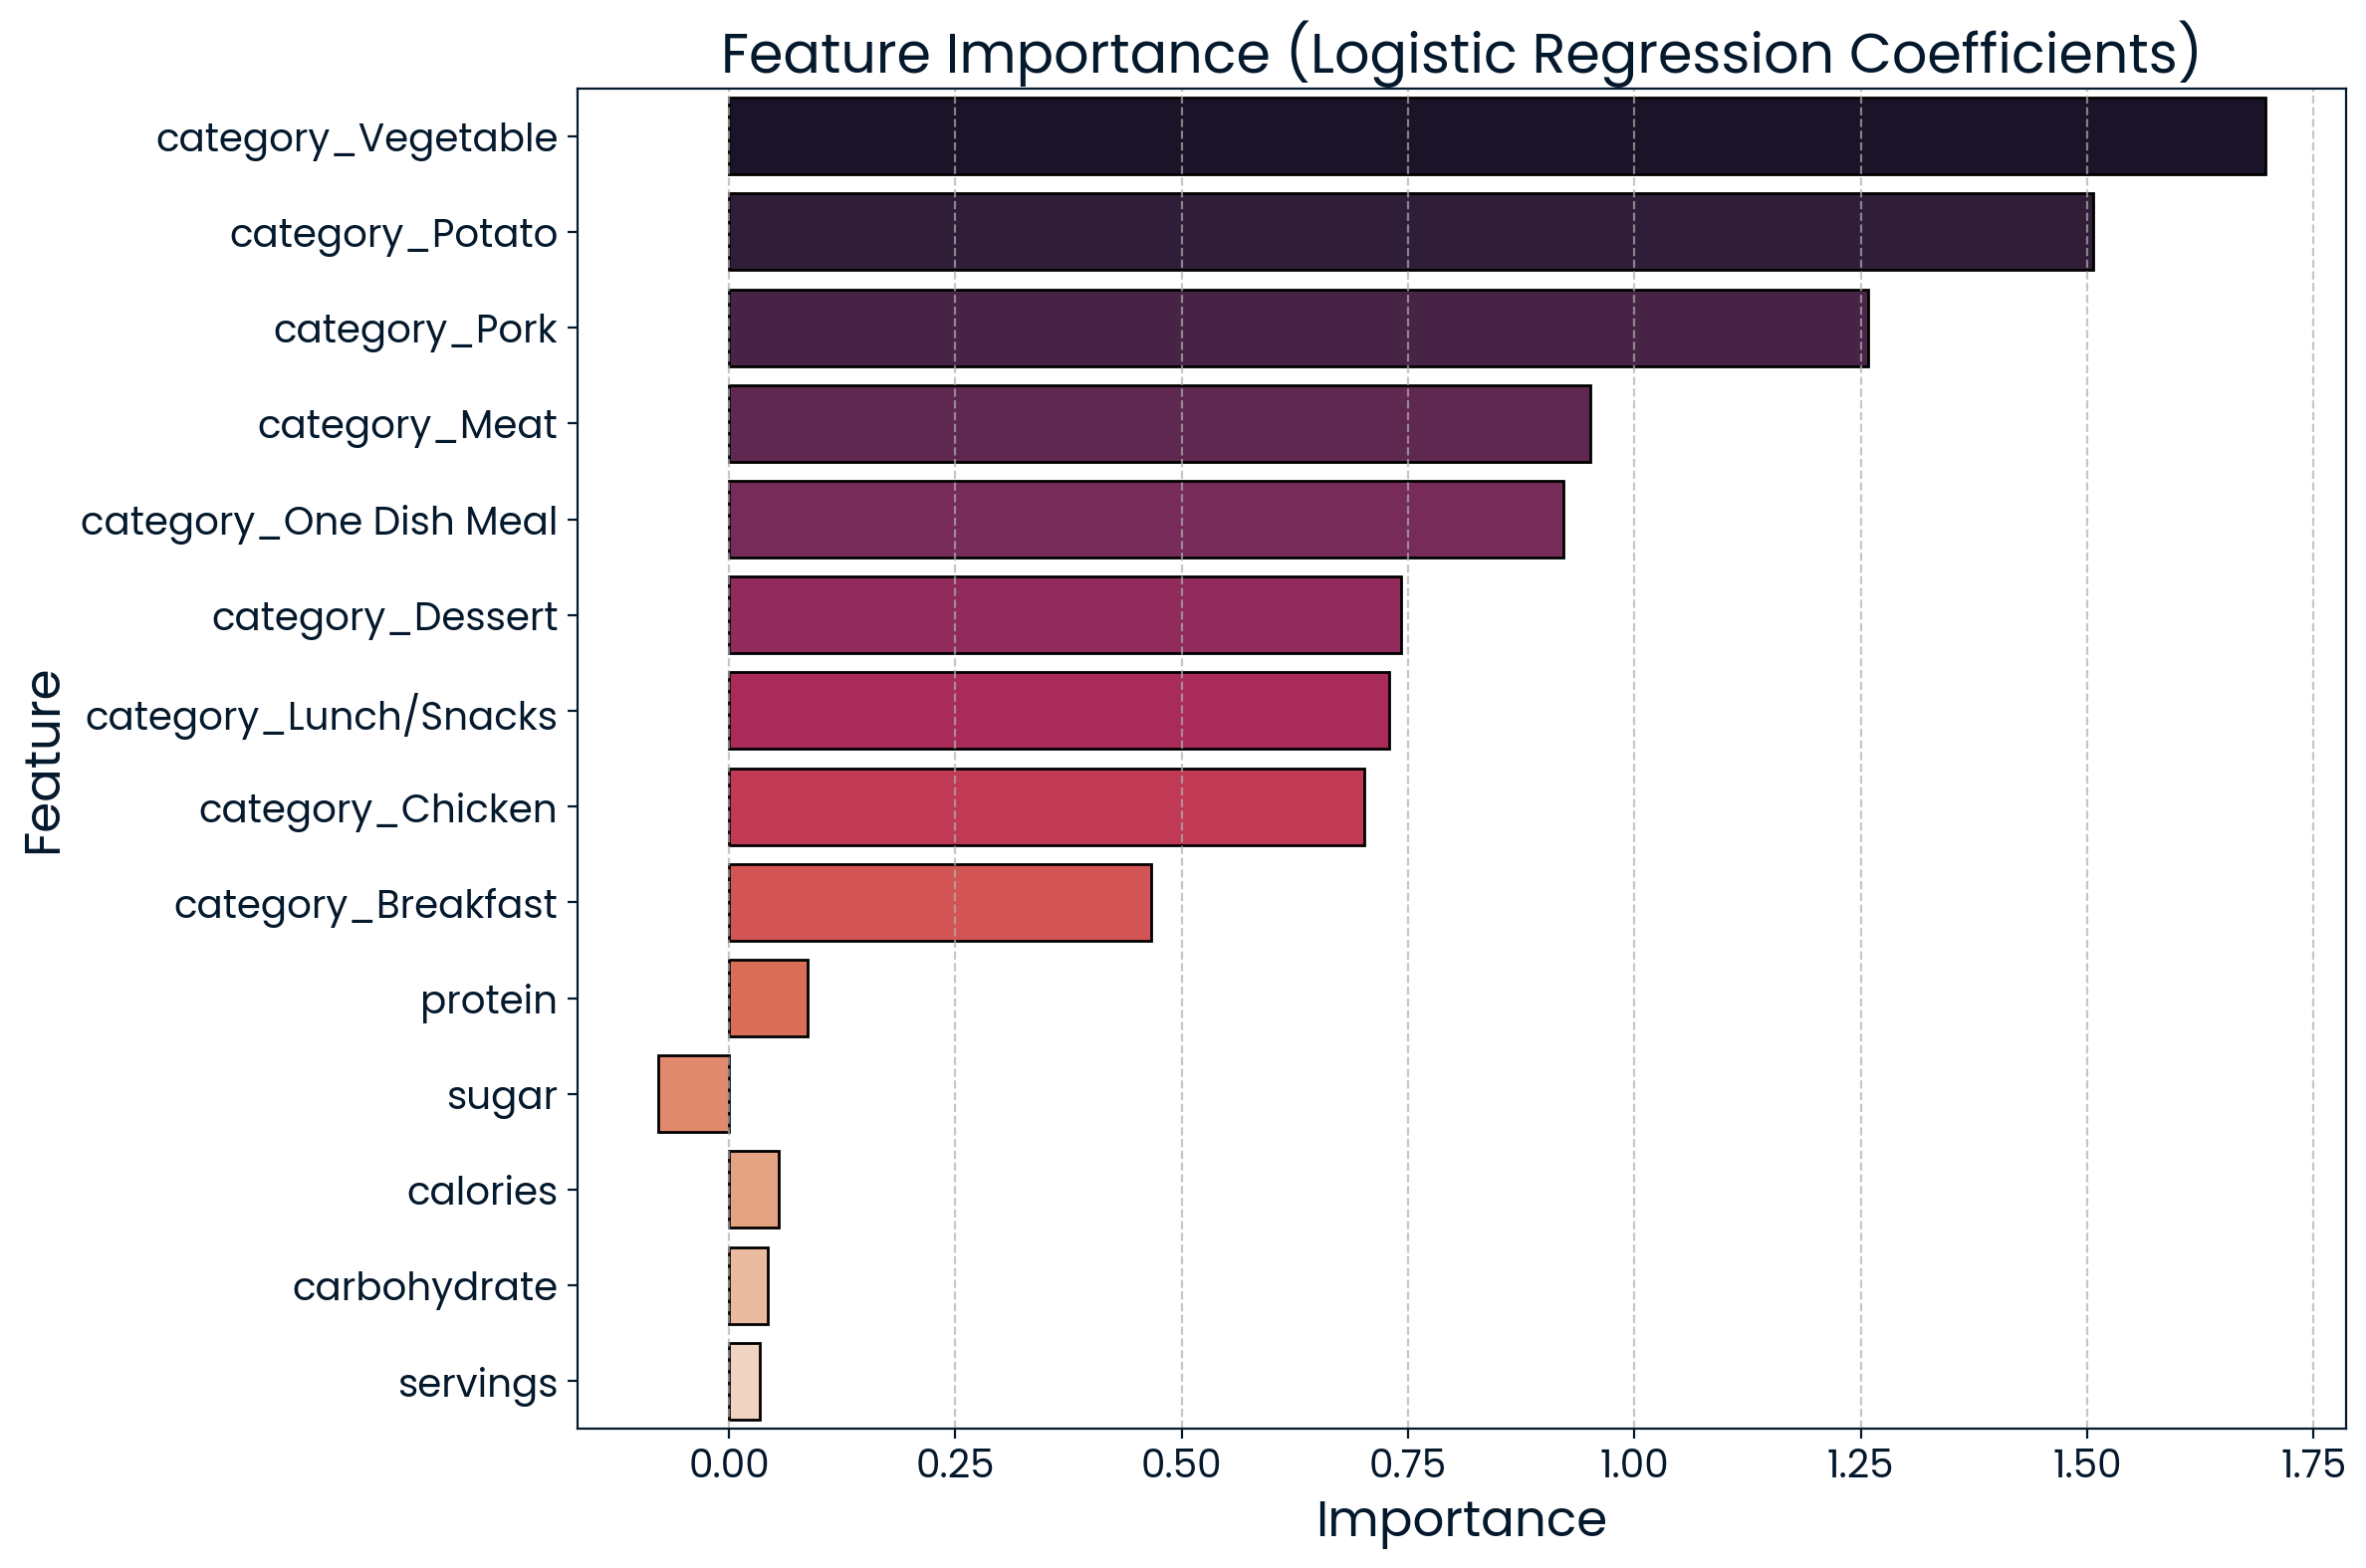

In [58]:
plt.figure(figsize=(12, 8))
sns.barplot(
    data=feature_importance, 
    x='Coefficient', 
    y='Feature', 
    palette='rocket',  
    edgecolor='black'   
)

plt.title('Feature Importance (Logistic Regression Coefficients)', fontsize=20)
plt.xlabel('Importance', fontsize=18)
plt.ylabel('Feature', fontsize=18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()



The Logistic Regression model's feature importance highlights that recipe categories, such as Vegetable, Potato, and Pork, are the most critical factors influencing whether a recipe will be categorized as "high-traffic." These categories collectively demonstrate the strongest direct relationship with recipe popularity, suggesting that the type of recipe plays a primary role in predicting traffic.

Nutritional attributes, such as protein, sugar, and calories, exhibit smaller coefficients, indicating a weaker linear relationship with popularity. Interestingly, the negative coefficient for sugar suggests that higher sugar content slightly decreases the likelihood of a recipe being classified as popular, aligning with potential consumer preferences for healthier options. While nutritional factors contribute, they appear secondary to the influence of recipe categories in this model.

# General Conclusions and Recommendations
**General Conclusion**

The goal of identifying high-traffic recipes has been effectively addressed through a comprehensive data-driven approach using Logistic Regression and Random Forest models. By optimizing thresholds and focusing on business objectives, the project achieved a well-balanced outcome that emphasizes precision and minimizes false positives, ensuring the most relevant recipes are recommended while reducing the likelihood of recommending unpopular ones.

**Key Findings**

**Model Performance**

Logistic Regression outperformed Random Forest at an optimized threshold of 0.45, achieving a precision of 82%, recall of 79%, and F1-score of 80%, making it the preferred model for meeting the business objective of correctly identifying high-traffic recipes while minimizing misclassification.


**Feature Importance**

Logistic Regression identified recipe categories as the strongest predictors of high traffic. Categories such as Vegetable, Potato, and Pork play a dominant role, indicating that recipe type is the most critical factor influencing popularity.

Nutritional factors, such as protein, sugar, and calories, had weaker but meaningful contributions, with sugar having a slight negative correlation, suggesting a preference for lower-sugar recipes.

**Recommendations**

**Product Optimization**

- **Focus on Key Categories:** Prioritize creating and promoting recipes in top-performing categories, such as Vegetable, Potato, and Pork, which have the highest impact on recipe traffic.
- **Nutritional Adjustments:** Explore recipes that balance protein and reduce sugar content, aligning with customer preferences for healthier options. This can also include developing specific low-sugar and high-protein recipe collections to attract health-conscious subscribers.
- **Enhance Low-Performing Categories:** Evaluate the underperformance of categories like Desserts and explore reformulating them to make them healthier or market them better, or deprioritize them to focus resources elsewhere.

**Marketing and Resource Allocation**

- **Category-Specific Campaigns:** Develop targeted campaigns, such as "Healthy Vegetable Specials" or "Protein-Packed Recipes," based on the most impactful categories to engage customers effectively.
- **Data-Driven Resource Allocation:** Use the model’s predictions to allocate resources efficiently, focusing on high-traffic recipes while minimizing investment in low-performing recipes. Avoid overspending on unpopular categories unless a strong reformulation plan is in place.

**Ongoing Monitoring and Model Retraining**

**Possible New Model Features**

These new features could enhance the model's performance:

**Track Customer Engagement Metrics:** Enhance the model’s predictive power by incorporating new features such as:
- **Average revisit rates:** How frequently customers revisit a recipe.
- **Recipe saves:** The number of times a recipe is saved by users.
- **Orders via premium subscription:** Data on premium customer orders can better link recipe popularity to revenue generation.
- **Cost per serving and ingredient trends:** Monitor ingredient costs and supply trends to forecast demand and prepare new recipes proactively.

Regularly update the model with new data to reflect evolving customer preferences and seasonal trends, ensuring ongoing relevance and accuracy.


**Operational and Financial Metrics**

Focus on critical subscription-based KPIs, such as:


- **Customer acquisition cost (CAC):** Ensure marketing efforts remain cost-effective.
- **Subscriber growth rate:** Monitor the pace of growth in paying subscribers.
- **Trial-to-paid conversion rate:** Optimize strategies to convert free-trial users into long-term subscribers.
- **Churn and retention rates:** Actively track and reduce churn to maintain revenue stability.
- **Feedback system:** Implement a recipe review system for immediate feedback and actionable insights into user preferences. This feedback can also serve as an additional feature for model training.


# Final Conclusion
The Logistic Regression model’s superior performance and interpretability, combined with actionable feature importance insights, allow Tasty Bytes to align its recommendations and resource allocation with consumer demand effectively. By focusing on recipe categories and nutritional preferences, the business can optimize offerings to maximize engagement and subscriber satisfaction.

Additionally, incorporating customer engagement and subscription-specific metrics ensures that Tasty Bytes continues to adapt to market trends and evolving customer needs. This approach provides a solid foundation for achieving long-term growth, improving customer retention, and maintaining a competitive edge in the subscription-based recipe planning market.